# **Telcom customers churn** - **Quiz Assessment**

# **Context**

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

# **Objective**

**What is Churn Analysis ?**

Customer churn analysis is the process of using your churn data to understand :

* Which customers are leaving ?
* Why are they leaving ?
* What can you do to reduce churn ?

As you may have guessed, churn analysis goes beyond just looking at your customer churn rate. It’s about discovering the underlying causes behind your numbers.

Ultimately, successful churn analysis will give you the valuable insights you need to start reducing your business’s customer attrition rate.


**You, as a data scientist at the telco company, have been provided the the following dataset to :**

* **Analyze and build an ML model to help identify which customers are more likely to churn.**
* **Find the factors driving the customer churn process.**
* **Create a profile of the customers which are likely to churn.**

# **Data Description**

The data contains the different attributes of customers and their interaction details with the telco company. The detailed data dictionary is given below.


**Data Dictionary**

Variable | Description
-- | --
CustomerID | A unique ID that identifies each customer.
Gender | The customer’s gender: Male, Female
SeniorCitizen | Indicates if the customer is 65 or older: Yes, No
Married | Indicates if the customer is married: Yes, No
Dependents | Indicates if the customer lives with any dependents: Yes, No. Dependents   could be children, parents, grandparents, etc.
Tenure | Indicates the total amount of months that the customer has been with the   company by the end of the quarter specified above.
PhoneService | Indicates if the customer subscribes to home phone service with the   company: Yes, No
MultipleLines | Indicates if the customer subscribes to multiple telephone lines with the   company: Yes, No
InternetService | Indicates if the customer subscribes to Internet service with the   company: No, DSL, Fiber Optic, Cable.
OnlineSecurity | Indicates if the customer subscribes to an additional online security   service provided by the company: Yes, No
OnlineBackup | Indicates if the customer subscribes to an additional online backup   service provided by the company: Yes, No
DeviceProtection | Indicates if the customer subscribes to an additional device protection   plan for their Internet equipment provided by the company: Yes, No
TechSupport | Indicates if the customer subscribes to an additional technical support   plan from the company with reduced wait times: Yes, No
StreamingTV | Indicates if the customer uses their Internet service to stream   television programing from a third party provider: Yes, No. The company does   not charge an additional fee for this service.
StreamingMovies | Indicates if the customer uses their Internet service to stream movies   from a third party provider: Yes, No. The company does not charge an   additional fee for this service.
Contract | Indicates the customer’s current contract type: Month-to-Month, One Year,   Two Year.
PaperlessBilling | Indicates if the customer has chosen paperless billing: Yes, No
PaymentMethod | Indicates how the customer pays their bill: Bank Withdrawal, Credit Card,   Mailed Check
MonthlyCharges | Indicates the customer’s current total monthly charge for all their   services from the company.
TotalCharges | Indicates the customer’s total charges, calculated to the end of the   quarter specified above.
Churn | Yes = the customer left the company this quarter. No = the customer   remained with the company.

# **Importing libraries**

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
# Encode categorical features as a one-hot numeric array.
from sklearn.preprocessing import OneHotEncoder

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# Encode target labels with value between 0 and n_classes-1.
# This transformer should be used to encode target values, i.e. y, and not the input X.
from sklearn.preprocessing import LabelEncoder

# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
# Univariate imputer for completing missing values with simple strategies.
# Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.
from sklearn.impute import SimpleImputer


from sklearn import set_config
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import backend

# **Data Overview**

In [2]:
# Read the dataset from csv file into a pandas df
df = pd.read_excel("Telco-Customer-Churn.xlsx")

In [3]:
# Copy the data to another variable to avoid any changes to original data
data = df.copy()

In [4]:
# Let's view the first 5 records from our dataset
data.head().T

,0,1,2,3,4
CustomerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
Gender,F,M,M,M,F
SeniorCitizen,No,No,No,No,No
Married,Yes,No,No,No,No
Dependents,No,No,No,No,No
Tenure,1.00000,34.00000,2.00000,NaN,2.00000
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,FTTX
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Married           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7038 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7039 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Checking for missing values in the data
data.isnull().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Married              0
Dependents           0
Tenure               5
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             4
PaperlessBilling     0
PaymentMethod        4
MonthlyCharges       3
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# Checking unique values in each categorical column
data.select_dtypes('object').nunique()

CustomerID          7043
Gender                 2
SeniorCitizen          2
Married                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64

In [9]:
# Checking for duplicate values
data.duplicated().sum()

0

In [10]:
# Dropping the columns
data = data.drop(['CustomerID'], axis=1)

# Creating numerical columns
num_cols = ['Tenure',	'MonthlyCharges',	'TotalCharges']

# Creating categorical variables
cat_cols = ['Gender',	'SeniorCitizen',	'Married',	'Dependents',	'PhoneService',	'MultipleLines',
            'InternetService',	'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport',
            'StreamingTV',	'StreamingMovies',	'Contract',	'PaperlessBilling',	'PaymentMethod']

## **Question (1)**

Update the bellow cell by providing your comments on following points

* Why CustomerID has been droped ?
* Why do we need to separate numerical & categorical variables ?
* Is there any issues with the dataset ? if yes what's the startegy to fix it ?

## **Response (1)**

**Observations**
* CustomerID doesnt affect the prediction wheather the client will leave or stay( it's even considered as noise that will affect the prediction accuracy)
* We need to seperate numerical & categorical variables, cause the categorical needs to be transformed into numerical data to pass into our model (ML models doens't accept categorical variables as input) 
* there's some missing values that needs to be handled

# **Exploratory Data Analysis**

## **Univariate Analysis**

### Categorical variables

In [11]:
data[cat_cols].describe().T

,count,unique,top,freq
Gender,7043,2,M,3555
SeniorCitizen,7043,2,No,5901
Married,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,FTTX,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


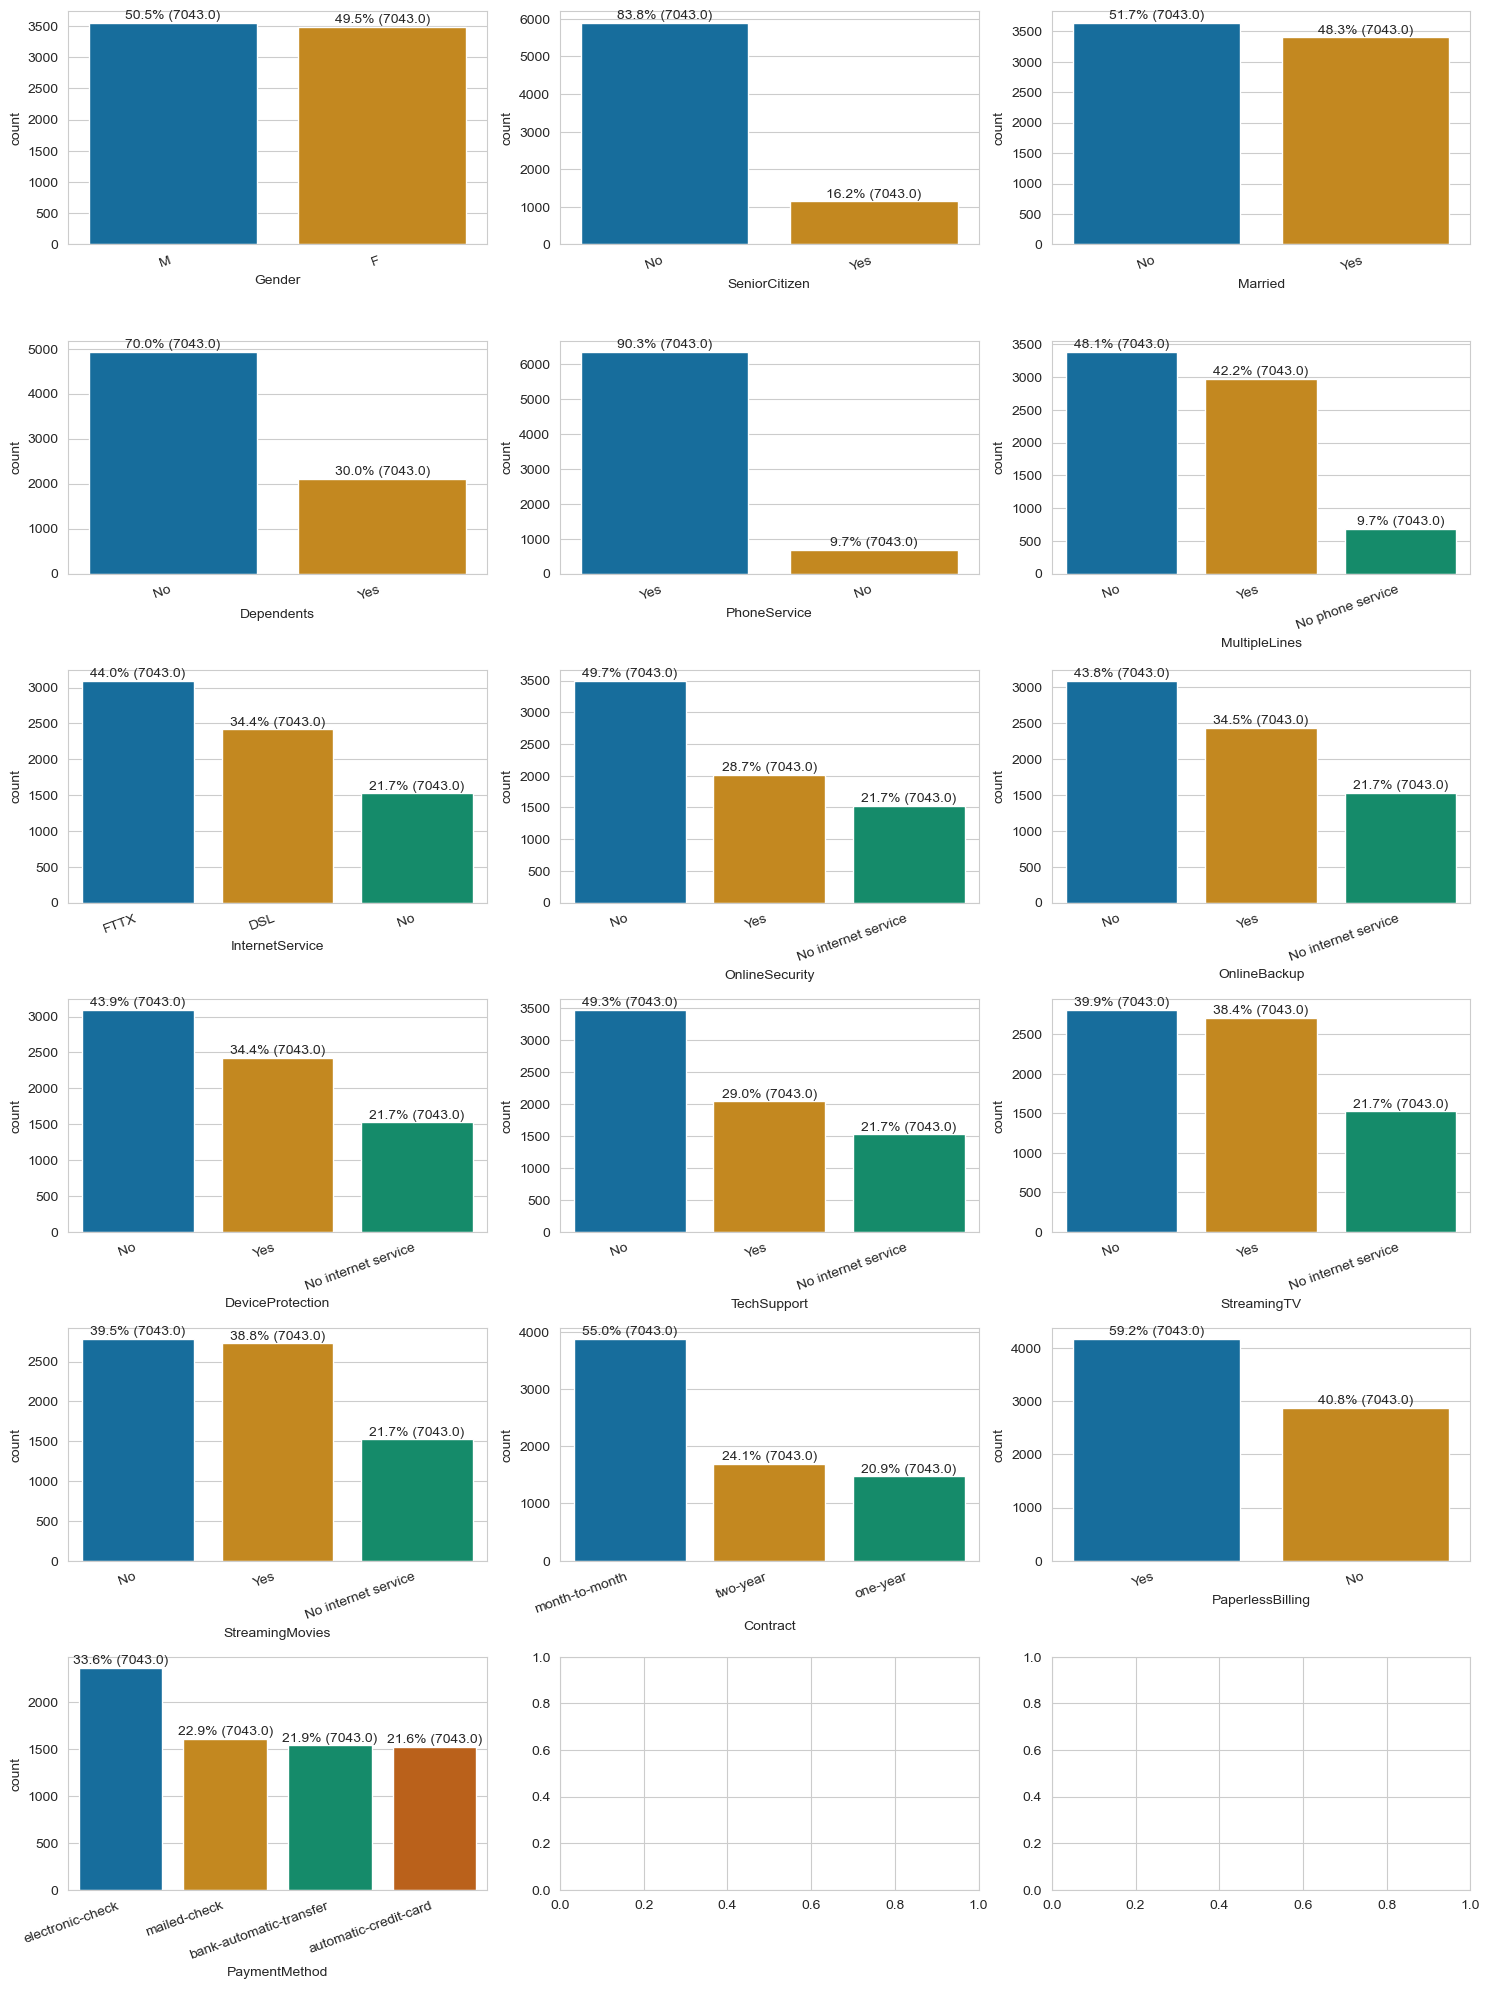

In [12]:
sns.set_style('whitegrid')
# Let's plot the counplot for each categorical variable
# Sow each 3 variables in one line of the grid
cat_col = [
            ['Gender',	'SeniorCitizen',	'Married'],
            ['Dependents', 'PhoneService',	'MultipleLines'],
            ['InternetService',	'OnlineSecurity', 'OnlineBackup'],
            ['DeviceProtection',	'TechSupport', 'StreamingTV'],
            ['StreamingMovies',	'Contract',	'PaperlessBilling'],
            ['PaymentMethod']
           ]
fig, axes = plt.subplots(6, 3, figsize = (15, 20))
ax_i = 0
for i in cat_col:
  ax_j = 0
  for j in i:
    plot = sns.countplot(ax = axes[ax_i, ax_j], x = j, data = data, order = data[j].value_counts().index, palette='colorblind')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=20, ha="right")
    for p in plot.patches:
      perc = '{:.1f}% ({:.1f})'.format(100 * p.get_height() / len(data[j]), len(data[j])) # Percentage of each class of the category
      x = p.get_x() + p.get_width() / 2  # Width of the plot
      y = p.get_height()                 # Height of the plot
      plot.annotate(perc, (x, y), ha = "center", va = "center", size = 10, xytext = (0, 5), textcoords = "offset points")        # Annotate the percentage
    # Move to the next position in the grid line
    ax_j = ax_j + 1
  # Move to the next line of the grid
  ax_i = ax_i + 1

# set the spacing between subplots
fig.tight_layout()
plt.show()

#### **Question (2)**

Update the bellow cell providing your observations on the distributuon of each categorical variable

#### **Response (2)**

**Observations**
- PhoneService & Multiplelines : majority of customers(around 90%) are using home phone service( and almost 48% of these customers have only one telephone line) and 9.7% withouth phone services.
- InternetService: Most customers use FTTX service.
- OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies: Most customers are not using these online services (on average 43%).
- Contract: Around 55% of customers prefer to get a Month-to-month contract.
- PaperLessBiling: Most customers prefer paperless billing, which aligns with the most customers don't have subscriptions to online services.
- PaymentMethod: around 33% of customer pays their bill through electronic check.

### Continuous variables

In [13]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,7038.00000,32.35209,24.55601,0.00000,9.00000,29.00000,55.00000,72.00000
MonthlyCharges,7040.00000,64.75424,30.08724,18.25000,35.50000,70.35000,89.85000,118.75000
TotalCharges,7032.00000,2283.30044,2266.77136,18.80000,401.45000,1397.47500,3794.73750,8684.80000


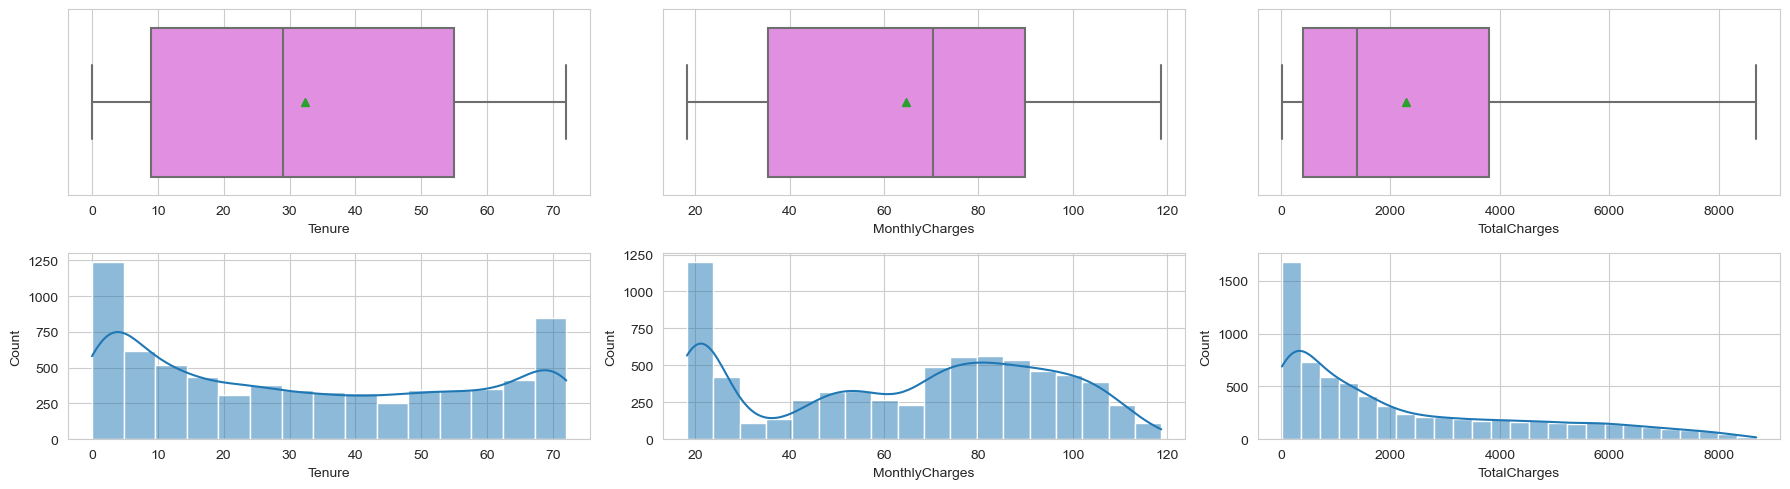

In [14]:
# Plot the boxplot and historgramme for each numerical variable
fig, axes = plt.subplots(2, 3, figsize = (18, 5))
ax = 0
for i in num_cols:
  sns.boxplot(data=data, x=i, ax=axes[0, ax], showmeans = True, color = "violet")
  sns.histplot(data=data, x=i, kde = True, ax = axes[1, ax], palette = "winter")
  # Move to the next position in the same line of the grid
  ax = ax + 1
# set the spacing between subplots
fig.tight_layout()
plt.show()

#### **Question (3)**

Update the bellow cell providing your observations on the distributuon of each numerical variable

#### **Response (3)**

**Observations**

Tenure:
- Boxplot: Median around 30 months; wide range, many new customers.
- Histogram: Peaks at both short (~0-10 months) and long (~70 months) tenures.

MonthlyCharges:
- Boxplot: Median around $70; wide range.
- Histogram: Peaks at low and high charges, dip in the middle.

TotalCharges:
- Boxplot: Median around $1400; right-skewed.
- Histogram: Majority have low total charges, aligning with new customers.

## **Bivariate Analysis**

### Categorical variables

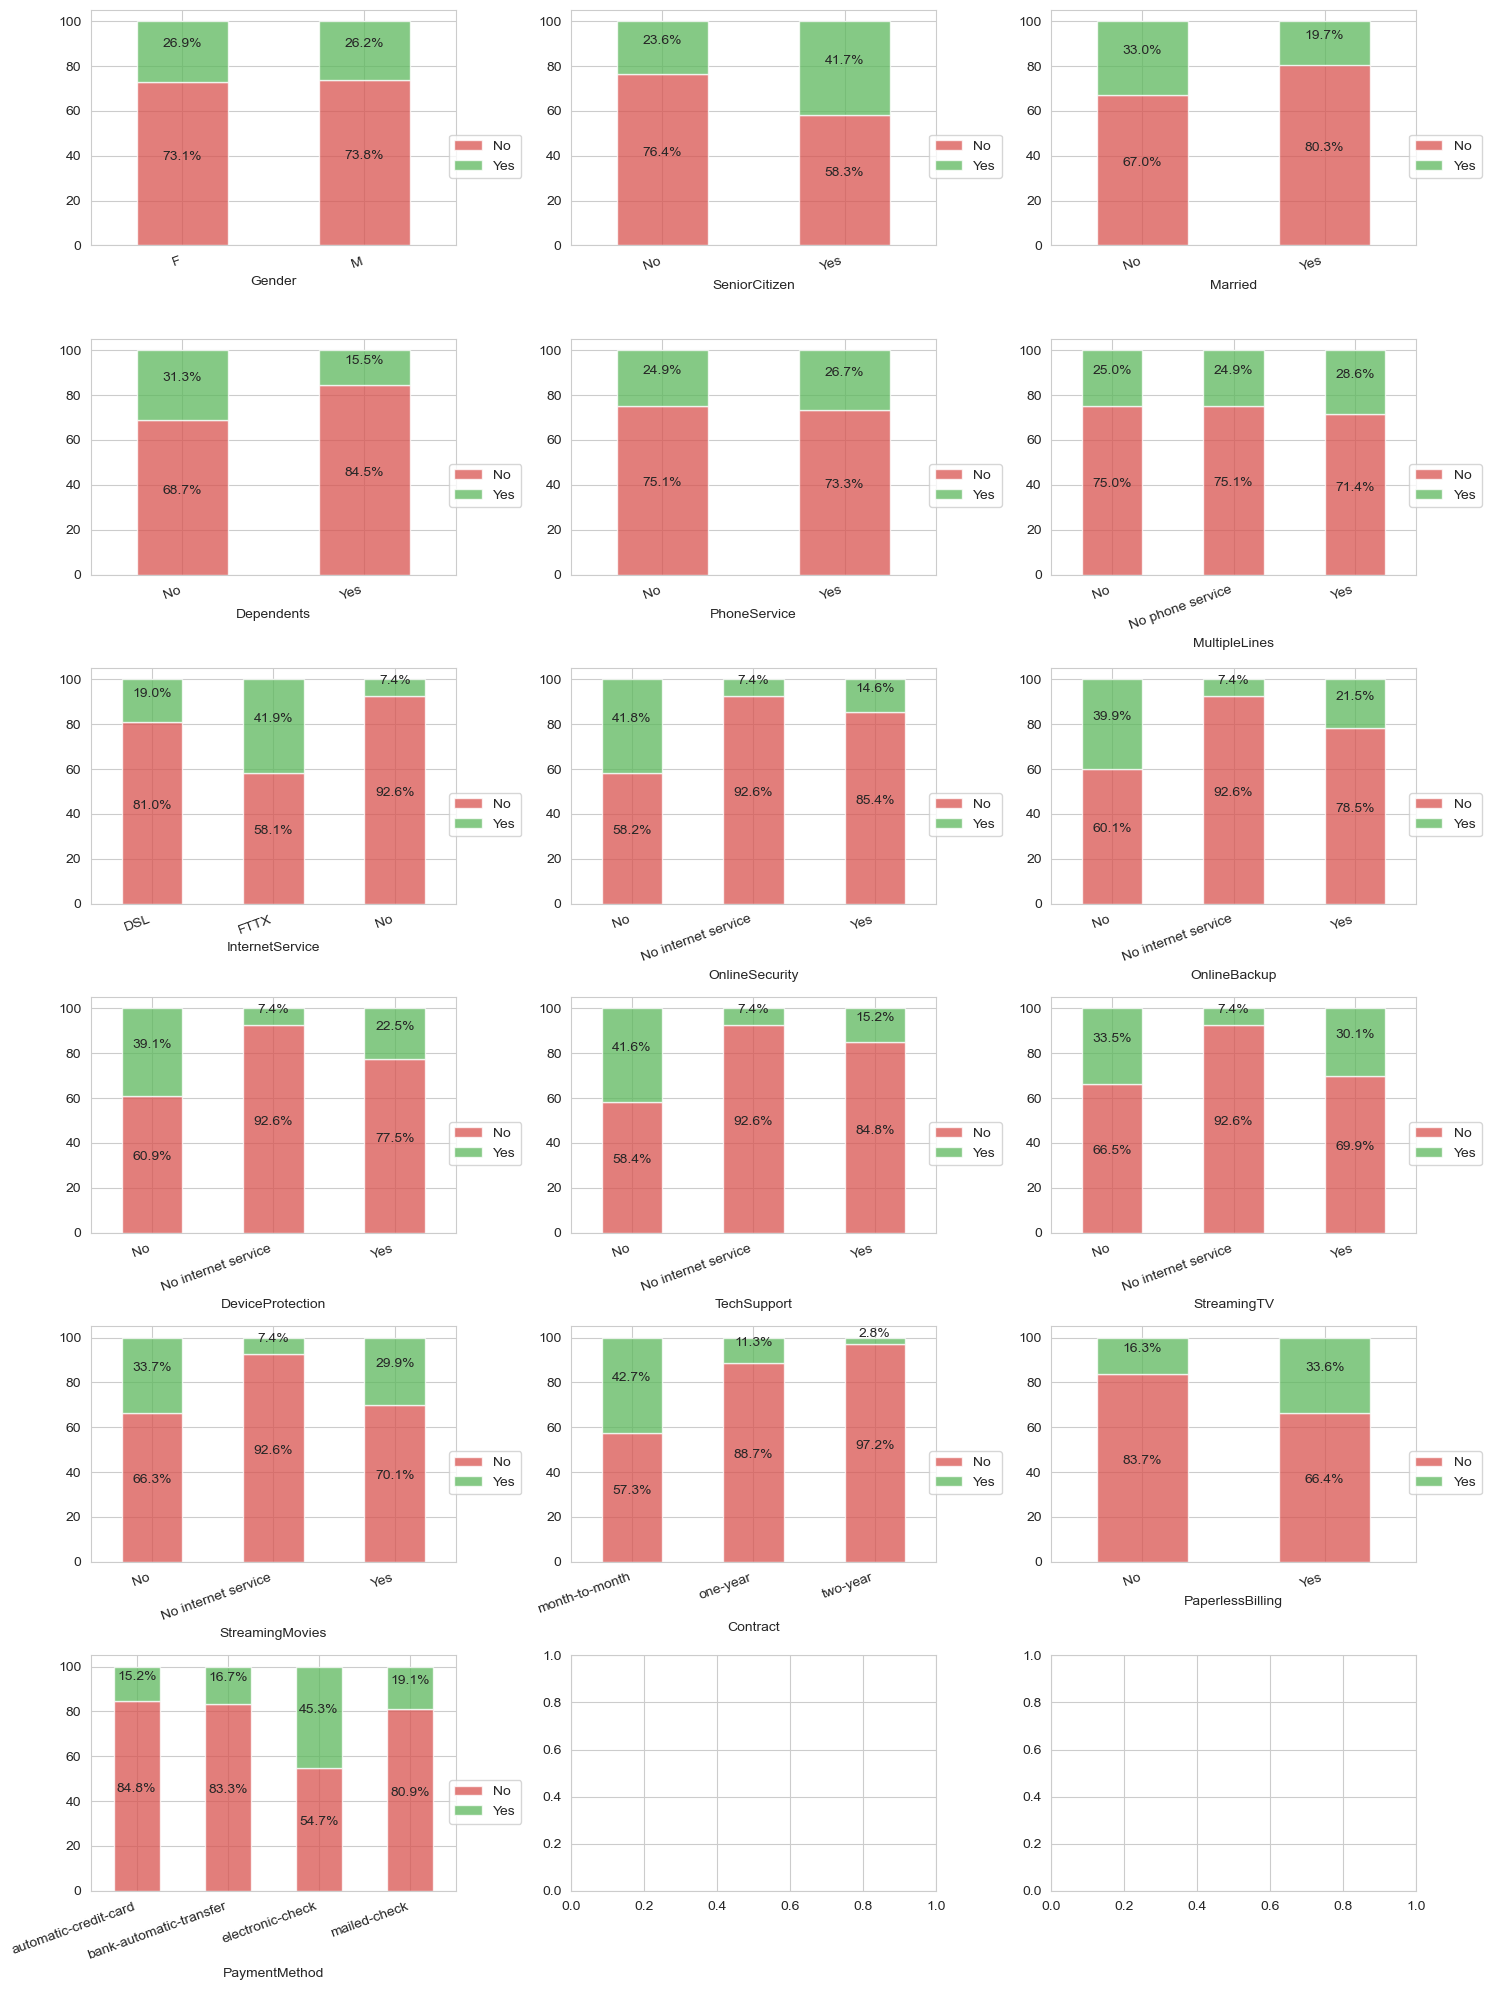

In [15]:
sns.set_style('whitegrid')
# Let's plot a barplot for each categorical variable showing how it participates in the conversion of leads
# Sow each 3 variables in one line of the grid
cat_col = [
            ['Gender',	'SeniorCitizen',	'Married'],
            ['Dependents', 'PhoneService',	'MultipleLines'],
            ['InternetService',	'OnlineSecurity', 'OnlineBackup'],
            ['DeviceProtection',	'TechSupport', 'StreamingTV'],
            ['StreamingMovies',	'Contract',	'PaperlessBilling'],
            ['PaymentMethod']
           ]
fig, axes = plt.subplots(6, 3, figsize = (15, 20))
ax_i = 0
for i in cat_col:
  ax_j = 0
  for j in i:
    plot = (pd.crosstab(data[j], data['Churn'], normalize='index') * 100).plot(kind='bar', stacked=True, ax=axes[ax_i, ax_j], alpha=0.75, rot=0, colormap='Paired', color=['#d9534f', '#5cb85c'])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=20, ha="right")
    patches, labels = plot.get_legend_handles_labels()
    plot.legend(patches, labels, bbox_to_anchor=(1.2, 0.5))
    for p in plot.patches:
      perc = '{:.1f}%'.format(p.get_height()) # Percentage of each class of the category
      x = p.get_x() + p.get_width() / 2   # Width of the plot
      y = p.get_y() + p.get_height() / 2  # Height of the plot
      plot.annotate(perc, (x, y), ha = "center", va = "center", size = 10, xytext = (0, 5), textcoords = "offset points")        # Annotate the percentage
    # Move to the next position in the grid line
    ax_j = ax_j + 1
  # Move to the next line of the grid
  ax_i = ax_i + 1


# set the spacing between subplots
fig.tight_layout()
plt.show()

#### **Question (4)**

Update the bellow cell providing your observations on how each numerical variable categorical to the churn of customers

#### **Response (4)**

**Observations**

- Gender: Churn seems to be equally distributed across both genders.
- SeniorCitizen:Senior citizens have a noticeably higher churn rate.
- Married:Married customers are less likely to churn compared to non-married ones.
- Dependents:Customers without dependents are more likely to churn.
- PhoneService:Doesn't significantly affect churn.
- MultipleLines:Customers with multiple lines have a slightly higher churn rate.
- InternetService:Customers with FTTX are more likely to churn compared to those with DSL or no internet service.
- OnlineSecurity:Lack of online security is a strong predictor for churn.
- OnlineBackup:Customers without online backup services are more prone to churn.
- DeviceProtection:Lack of device protection correlates with a higher churn rate.
- TechSupport:Absence of tech support is another strong predictor for churn.
- StreamingTV:Doesn't significantly affect churn.
- StreamingMovies:Doesn't significantly affect churn.
- Contract:Month-to-month customers have a high churn rate, while those with longer contracts are more loyal.
- PaperlessBilling:Customers with paperless billing are more likely to churn.
- PaymentMethod:Customers using electronic checks have the highest churn rate.

### Continuous variables

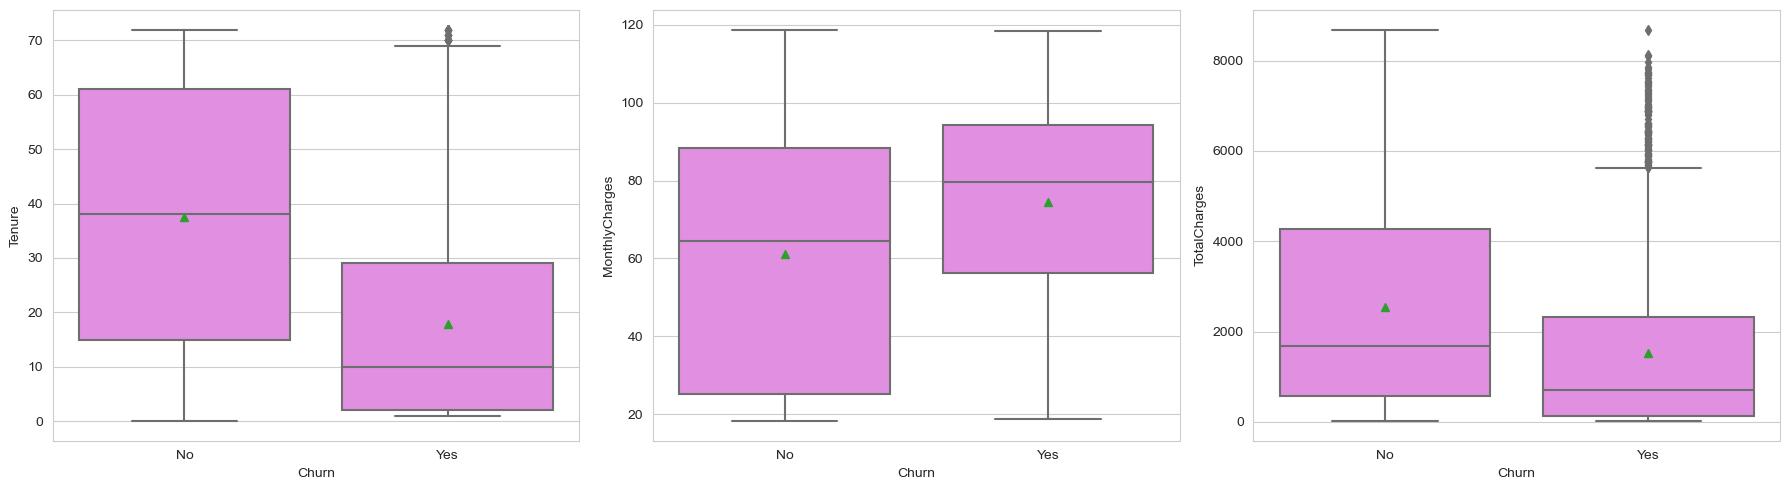

In [16]:
# Plot the boxplot for each numerical variable with the split of status
fig, axes = plt.subplots(1, 3, figsize = (18, 5))
ax = 0
for i in num_cols:
  sns.boxplot(data=data, x='Churn', y=i, ax=axes[ax], showmeans=True, color="violet")
  # Move to the next position in the same line of the grid
  ax = ax + 1
# set the spacing between subplots
fig.tight_layout()
plt.show()

#### **Question (5)**

Update the bellow cell providing your observations on how each numerical variable contribute to the churn of customers

#### **Response (5)**

**Observations**

- Tenure:Customers with shorter tenure churned more. The median tenure for churned customers is significantly lower than that for customers who stayed.
- MonthlyCharges:Customers with higher monthly charges are more likely to churn. The median monthly charge for churned customers is higher compared to those who stayed.
- TotalCharges:There is less distinction here, but the median total charge for customers who stayed is higher, indicating that long-term customers are less likely to churn.

## **Multivariate Analysis**

<AxesSubplot:>

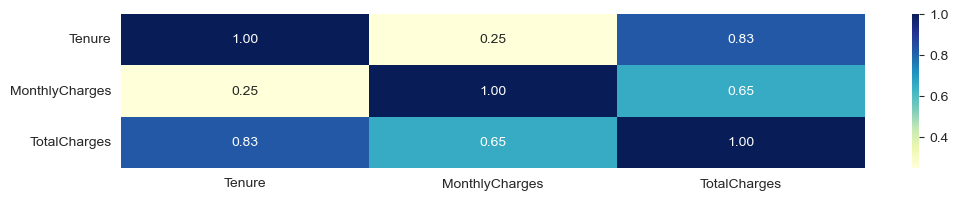

In [17]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(12, 2))
sns.heatmap(data[num_cols].corr(), annot=True, fmt='0.2f', cmap='YlGnBu')

#### **Question (6)**

Update the bellow cell providing your observations on the correlation matrix

#### **Response (6)**

**Observations**

- Tenure and MonthlyCharges: There is a low positive correlation (0.25) between tenure and monthly charges. This suggests that as customers stay longer, they might opt for services that result in slightly higher monthly charges.

- Tenure and TotalCharges: There is a strong positive correlation (0.83) between tenure and total charges. This is expected as the longer a customer stays, the higher their total charges would be.

- MonthlyCharges and TotalCharges: There is a moderate positive correlation (0.65) between monthly charges and total charges. This indicates that customers who have higher monthly bills generally also have higher total charges.

In [18]:
num_cols

['Tenure', 'MonthlyCharges', 'TotalCharges']

<span style="color:#ff5f27;"> 👾 Uncomment and update the following cell code if required </span>

In [19]:
# Columns to be droped if required
#col_drop = ['', '', '', '']
#data.drop(col_drop, axis=1, inplace=True)

# **Data Preprocessing**

## **Splitting the Data**

<span style="color:#ff5f27;"> 👾 Uncomment and update the following cell code if required </span>

In [20]:
data['Churn'] = np.where(data['Churn'] == 'Yes', 1, 0)
data['Churn'] = data['Churn'].astype(int)

In [21]:
data['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

**Separating the independent variables (X) and the dependent variable (Y)**

In [22]:
## Separating Independent and Dependent Columns
X = data.drop(['Churn'], axis=1)
Y = data[['Churn']]

In [23]:
Y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


**Splitting the data into 70% train and 30% test set**

In [48]:
# Splitting the dataset into the Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42, stratify = Y)

## **Transforming the dataset**

In [49]:
X_train.isnull().sum()

Gender              0
SeniorCitizen       0
Married             0
Dependents          0
Tenure              3
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       2
MonthlyCharges      3
TotalCharges        7
dtype: int64

In [50]:
X_test.isnull().sum()

Gender              0
SeniorCitizen       0
Married             0
Dependents          0
Tenure              2
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            4
PaperlessBilling    0
PaymentMethod       2
MonthlyCharges      0
TotalCharges        4
dtype: int64

* Tenure
* MonthlyCharges
* Contract
* PaperlessBilling
* PaymentMethod

We Will impute the missing values in columns using :
* their **mode** for categorical variables
* their **mean** for continuous variables

### **Question (7)**

* Create the required python code for the missing values imputation applied to continuous & categorical variables.
* Explain reasons behind applying these transformations after the data splitting ?

In [51]:
imputer_mode = SimpleImputer(strategy="most_frequent")
imputer_mean = SimpleImputer(strategy="mean")

In [52]:
# Provide code here for Question (7)

X_train[['Tenure', 'MonthlyCharges','TotalCharges']] = imputer_mean.fit_transform(X_train[['Tenure', 'MonthlyCharges','TotalCharges']])
X_train[['Contract', 'PaperlessBilling', 'PaymentMethod']] = imputer_mode.fit_transform(X_train[['Contract', 'PaperlessBilling', 'PaymentMethod']])

X_test[['Tenure', 'MonthlyCharges','TotalCharges']] = imputer_mean.fit_transform(X_test[['Tenure', 'MonthlyCharges','TotalCharges']])
X_test[['Contract', 'PaperlessBilling', 'PaymentMethod']] = imputer_mode.fit_transform(X_test[['Contract', 'PaperlessBilling', 'PaymentMethod']])

Reason: If we impute before splitting, the mean/mode will be calculated using the entire dataset, including the test set, introducing data leakage

In [53]:
X_test.isnull().sum()

Gender              0
SeniorCitizen       0
Married             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Often in machine learning, we want to convert categorical variables into some type of numeric format that can be readily used by algorithms.

There are two common ways to convert categorical variables into numeric variables:

1. Label Encoding: Assign each categorical value an integer value based on alphabetical order.

2. One Hot Encoding: Create new variables that take on values 0 and 1 to represent the original categorical values. When using this approach, we create one new column for each unique value in the original categorical variable.

In [54]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(data[i].value_counts(normalize=True) * 100)
    print('*' * 40)
    print()

M   50.47565
F   49.52435
Name: Gender, dtype: float64
****************************************

No    83.78532
Yes   16.21468
Name: SeniorCitizen, dtype: float64
****************************************

No    51.69672
Yes   48.30328
Name: Married, dtype: float64
****************************************

No    70.04118
Yes   29.95882
Name: Dependents, dtype: float64
****************************************

Yes   90.31663
No     9.68337
Name: PhoneService, dtype: float64
****************************************

No                 48.13290
Yes                42.18373
No phone service    9.68337
Name: MultipleLines, dtype: float64
****************************************

FTTX   43.95854
DSL    34.37456
No     21.66690
Name: InternetService, dtype: float64
****************************************

No                    49.66634
Yes                   28.66676
No internet service   21.66690
Name: OnlineSecurity, dtype: float64
****************************************

No                 

### **Question (8)**

In [55]:
col_encoded = ['SeniorCitizen', 'Married', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

* Analyse variables from list `col_encoded` and argument what strategy you will use to encode them.
* Create the required python code for encoding all variables from list `col_encoded`

In [56]:
# Provide code here for Question (8)
binary_columns = ['SeniorCitizen', 'Married', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_columns: 
    X_train[col] = LabelEncoder().fit_transform(X_train[col])
    X_test[col] = LabelEncoder().fit_transform(X_test[col])



In [57]:

ncols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

X_train = pd.get_dummies(X_train, columns=ncols, drop_first=True)
X_test  = pd.get_dummies(X_test , columns=ncols, drop_first=True)



In [58]:
X_train

,Gender,SeniorCitizen,Married,Dependents,Tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_FTTX,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
5557,F,0,0,0,5.00000,1,month-to-month,0,electronic-check,80.20000,384.25000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2270,F,1,0,0,3.00000,1,month-to-month,1,electronic-check,86.85000,220.95000,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
6930,F,0,1,0,3.00000,1,month-to-month,1,automatic-credit-card,75.15000,216.75000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2257,F,0,0,0,60.00000,1,one-year,0,automatic-credit-card,80.55000,4847.05000,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1
898,F,0,0,0,12.00000,1,month-to-month,1,bank-automatic-transfer,98.90000,1120.95000,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250,M,0,0,0,63.00000,1,one-year,0,automatic-credit-card,104.50000,6590.80000,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0
1488,M,0,0,0,1.00000,1,month-to-month,0,mailed-check,51.25000,51.25000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6303,F,0,1,0,71.00000,1,two-year,0,electronic-check,109.25000,7707.70000,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1
2710,F,0,1,0,24.00000,1,one-year,0,automatic-credit-card,20.40000,482.80000,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0


Binary Columns: The variables like 'SeniorCitizen', 'Married', 'Dependents', 'PhoneService', and 'PaperlessBilling' have been label-encoded. They are now represented by 0 and 1.
Nominal Columns: The nominal variables such as 'MultipleLines', 'InternetService', 'OnlineSecurity', etc., have been one-hot encoded. New columns have been added for each category of these variables, filled with 1 and 0.

* Create a new variable called `IsFemale` that will replace the variable `Gender`


In [59]:
# Provide code here for Question (8)
X_train['IsFemale'] = X_train['Gender'].apply(lambda x: 1 if x == 'F' else 0)
X_train.drop('Gender', axis=1, inplace=True)

X_test['IsFemale'] = X_test['Gender'].apply(lambda x: 1 if x == 'F' else 0)
X_test.drop('Gender', axis=1, inplace=True)


In [60]:
X_train.head().T

,5557,2270,6930,2257,898
SeniorCitizen,0,1,0,0,0
Married,0,0,1,0,0
Dependents,0,0,0,0,0
Tenure,5.00000,3.00000,3.00000,60.00000,12.00000
PhoneService,1,1,1,1,1
Contract,month-to-month,month-to-month,month-to-month,one-year,month-to-month
PaperlessBilling,0,1,1,0,1
PaymentMethod,electronic-check,electronic-check,automatic-credit-card,automatic-credit-card,bank-automatic-transfer
MonthlyCharges,80.20000,86.85000,75.15000,80.55000,98.90000
TotalCharges,384.25000,220.95000,216.75000,4847.05000,1120.95000


In [61]:
X_test.head().T

,4994,6828,755,404,981
SeniorCitizen,0,0,1,0,0
Married,0,1,0,0,1
Dependents,0,1,0,0,1
Tenure,18.00000,8.00000,20.00000,20.00000,40.00000
PhoneService,1,1,1,1,1
Contract,month-to-month,two-year,month-to-month,two-year,two-year
PaperlessBilling,1,0,1,1,0
PaymentMethod,electronic-check,mailed-check,electronic-check,mailed-check,mailed-check
MonthlyCharges,96.05000,19.05000,98.55000,19.70000,19.60000
TotalCharges,1740.70000,201.70000,1842.80000,419.40000,808.95000


### **Question (9)**

In [62]:
col_encoded = ['PaymentMethod', 'Contract']

* Analyse variables from list `col_encoded` and argument what strategy you will use to encode them.
* Create the required python code for encoding all variables from list `col_encoded`

In [63]:
# Provide code here for Question (9)

X_train = pd.get_dummies(X_train, columns=col_encoded, drop_first=True)
X_test  = pd.get_dummies(X_test , columns=col_encoded, drop_first=True)


In [64]:
X_train.head().T

,5557,2270,6930,2257,898
SeniorCitizen,0.00000,1.00000,0.00000,0.00000,0.00000
Married,0.00000,0.00000,1.00000,0.00000,0.00000
Dependents,0.00000,0.00000,0.00000,0.00000,0.00000
Tenure,5.00000,3.00000,3.00000,60.00000,12.00000
PhoneService,1.00000,1.00000,1.00000,1.00000,1.00000
PaperlessBilling,0.00000,1.00000,1.00000,0.00000,1.00000
MonthlyCharges,80.20000,86.85000,75.15000,80.55000,98.90000
TotalCharges,384.25000,220.95000,216.75000,4847.05000,1120.95000
MultipleLines_No phone service,0.00000,0.00000,0.00000,0.00000,0.00000
MultipleLines_Yes,0.00000,0.00000,1.00000,1.00000,0.00000


In [65]:
X_test.head().T

,4994,6828,755,404,981
SeniorCitizen,0.00000,0.00000,1.00000,0.00000,0.00000
Married,0.00000,1.00000,0.00000,0.00000,1.00000
Dependents,0.00000,1.00000,0.00000,0.00000,1.00000
Tenure,18.00000,8.00000,20.00000,20.00000,40.00000
PhoneService,1.00000,1.00000,1.00000,1.00000,1.00000
PaperlessBilling,1.00000,0.00000,1.00000,1.00000,0.00000
MonthlyCharges,96.05000,19.05000,98.55000,19.70000,19.60000
TotalCharges,1740.70000,201.70000,1842.80000,419.40000,808.95000
MultipleLines_No phone service,0.00000,0.00000,0.00000,0.00000,0.00000
MultipleLines_Yes,0.00000,0.00000,1.00000,0.00000,0.00000


# **Model Evaluation Criterion**

The model will make a number of mistakes.
It will predicts some correctly and few incorrectly. For example, it will marks some of the customers who will churn as not churn and also will marks some of the customers who will not churn as someone who will churn.

The goal for the telco company is to engage and talk to the customers to prevent them from churning, its ok to engage with those who are mistakenly tagged as "not churned" as it does not cause any negative problem. It could potentially make them even happier for the extra love they are getting. This is the kind of model that can add value from day one.

Let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

In [66]:
# Creating metric function
def metrics_score(actual, predicted):
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.htm
    print(classification_report(actual, predicted, target_names=['Not Churn (0)', 'Churn (1)'], digits=4))

    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    cm = confusion_matrix(actual, predicted)
    tn, fp, fn, tp = cm.ravel()
    group_names = ['TN', 'FP', 'FN', 'TP']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1} ({v2}) ({v3})' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(6, 3))
    sns.heatmap(cm, annot=labels,  fmt='', xticklabels=['Not Churn (0)', 'Churn (1)'], yticklabels=['Not Churn (0)', 'Churn (1)'], cmap='Blues')
    plt.ylabel('Actual classes')
    plt.xlabel('Predicted classes')
    plt.show()

# **Decision Tree**

In [67]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight={0: 0.27, 1: 0.73}, random_state=1)

In [68]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.27, 1: 0.73}, random_state=1)

**Let's check the model performance of decision tree**

               precision    recall  f1-score   support

Not Churn (0)     0.9997    0.9972    0.9985      3622
    Churn (1)     0.9924    0.9992    0.9958      1308

     accuracy                         0.9978      4930
    macro avg     0.9961    0.9982    0.9971      4930
 weighted avg     0.9978    0.9978    0.9978      4930



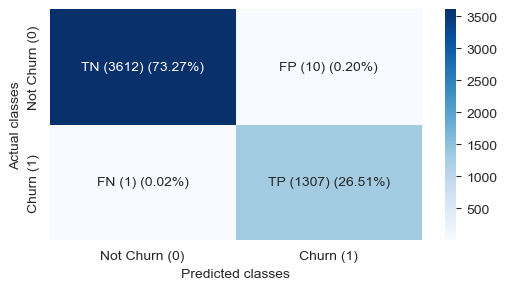

In [69]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

               precision    recall  f1-score   support

Not Churn (0)     0.8009    0.8138    0.8073      1552
    Churn (1)     0.4608    0.4403    0.4503       561

     accuracy                         0.7146      2113
    macro avg     0.6309    0.6270    0.6288      2113
 weighted avg     0.7106    0.7146    0.7125      2113



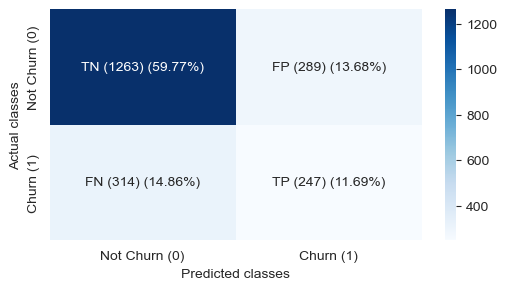

In [70]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

#### **Question (10)**

Update the bellow cell providing your observations on the model performance

#### **Response (10)**

**Observations**
it seems that our model is overfitting, cause of high performance in training and low testing data
** Training Data:
* Precision, Recall, and F1-score: All these metrics are extremely high, almost reaching perfection (close to 1) for both classes. This suggests that the model has learned the training data very well, perhaps too well.

* Accuracy: The model is 99.78% accurate on the training data, which is unusually high and a red flag for overfitting.

** Test Data:
* Precision, Recall, and F1-score: The metrics have dropped significantly for both classes, especially for the "Churn" class. For instance, the F1-score for "Churn" dropped from 0.9958 in the training set to 0.4503 in the test set.

* Accuracy: The accuracy dropped to 71.46% on the test data, which is much lower than the training accuracy.

**Let's plot the feature importance and check the most important features.**

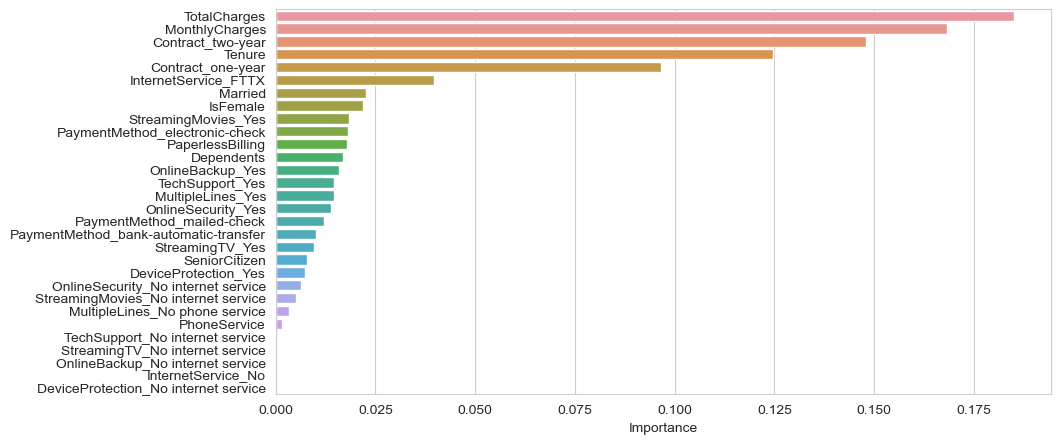

In [71]:
# Plot the feature importance
importances = dt.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (10, 5))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)
plt.show()

#### **Question (11)**

Update the bellow cell providing your observations on features importance

#### **Response (11)**

**Observations**
* as we can see from the graph that TotalCharge,MonthlyCharges and Contract_two_yearand Tenure are more important for making decisions weather a customer will churn or not 
while online service play almost no role in prediction

**Let's plot the tree** and check:

As we know the decision tree keeps growing until the nodes are homogeneous, i.e., it has only one class, and the dataset here has a lot of features, it would be hard to visualize the whole tree with so many features. Therefore, we are only visualizing the tree up to **max_depth = 4**.

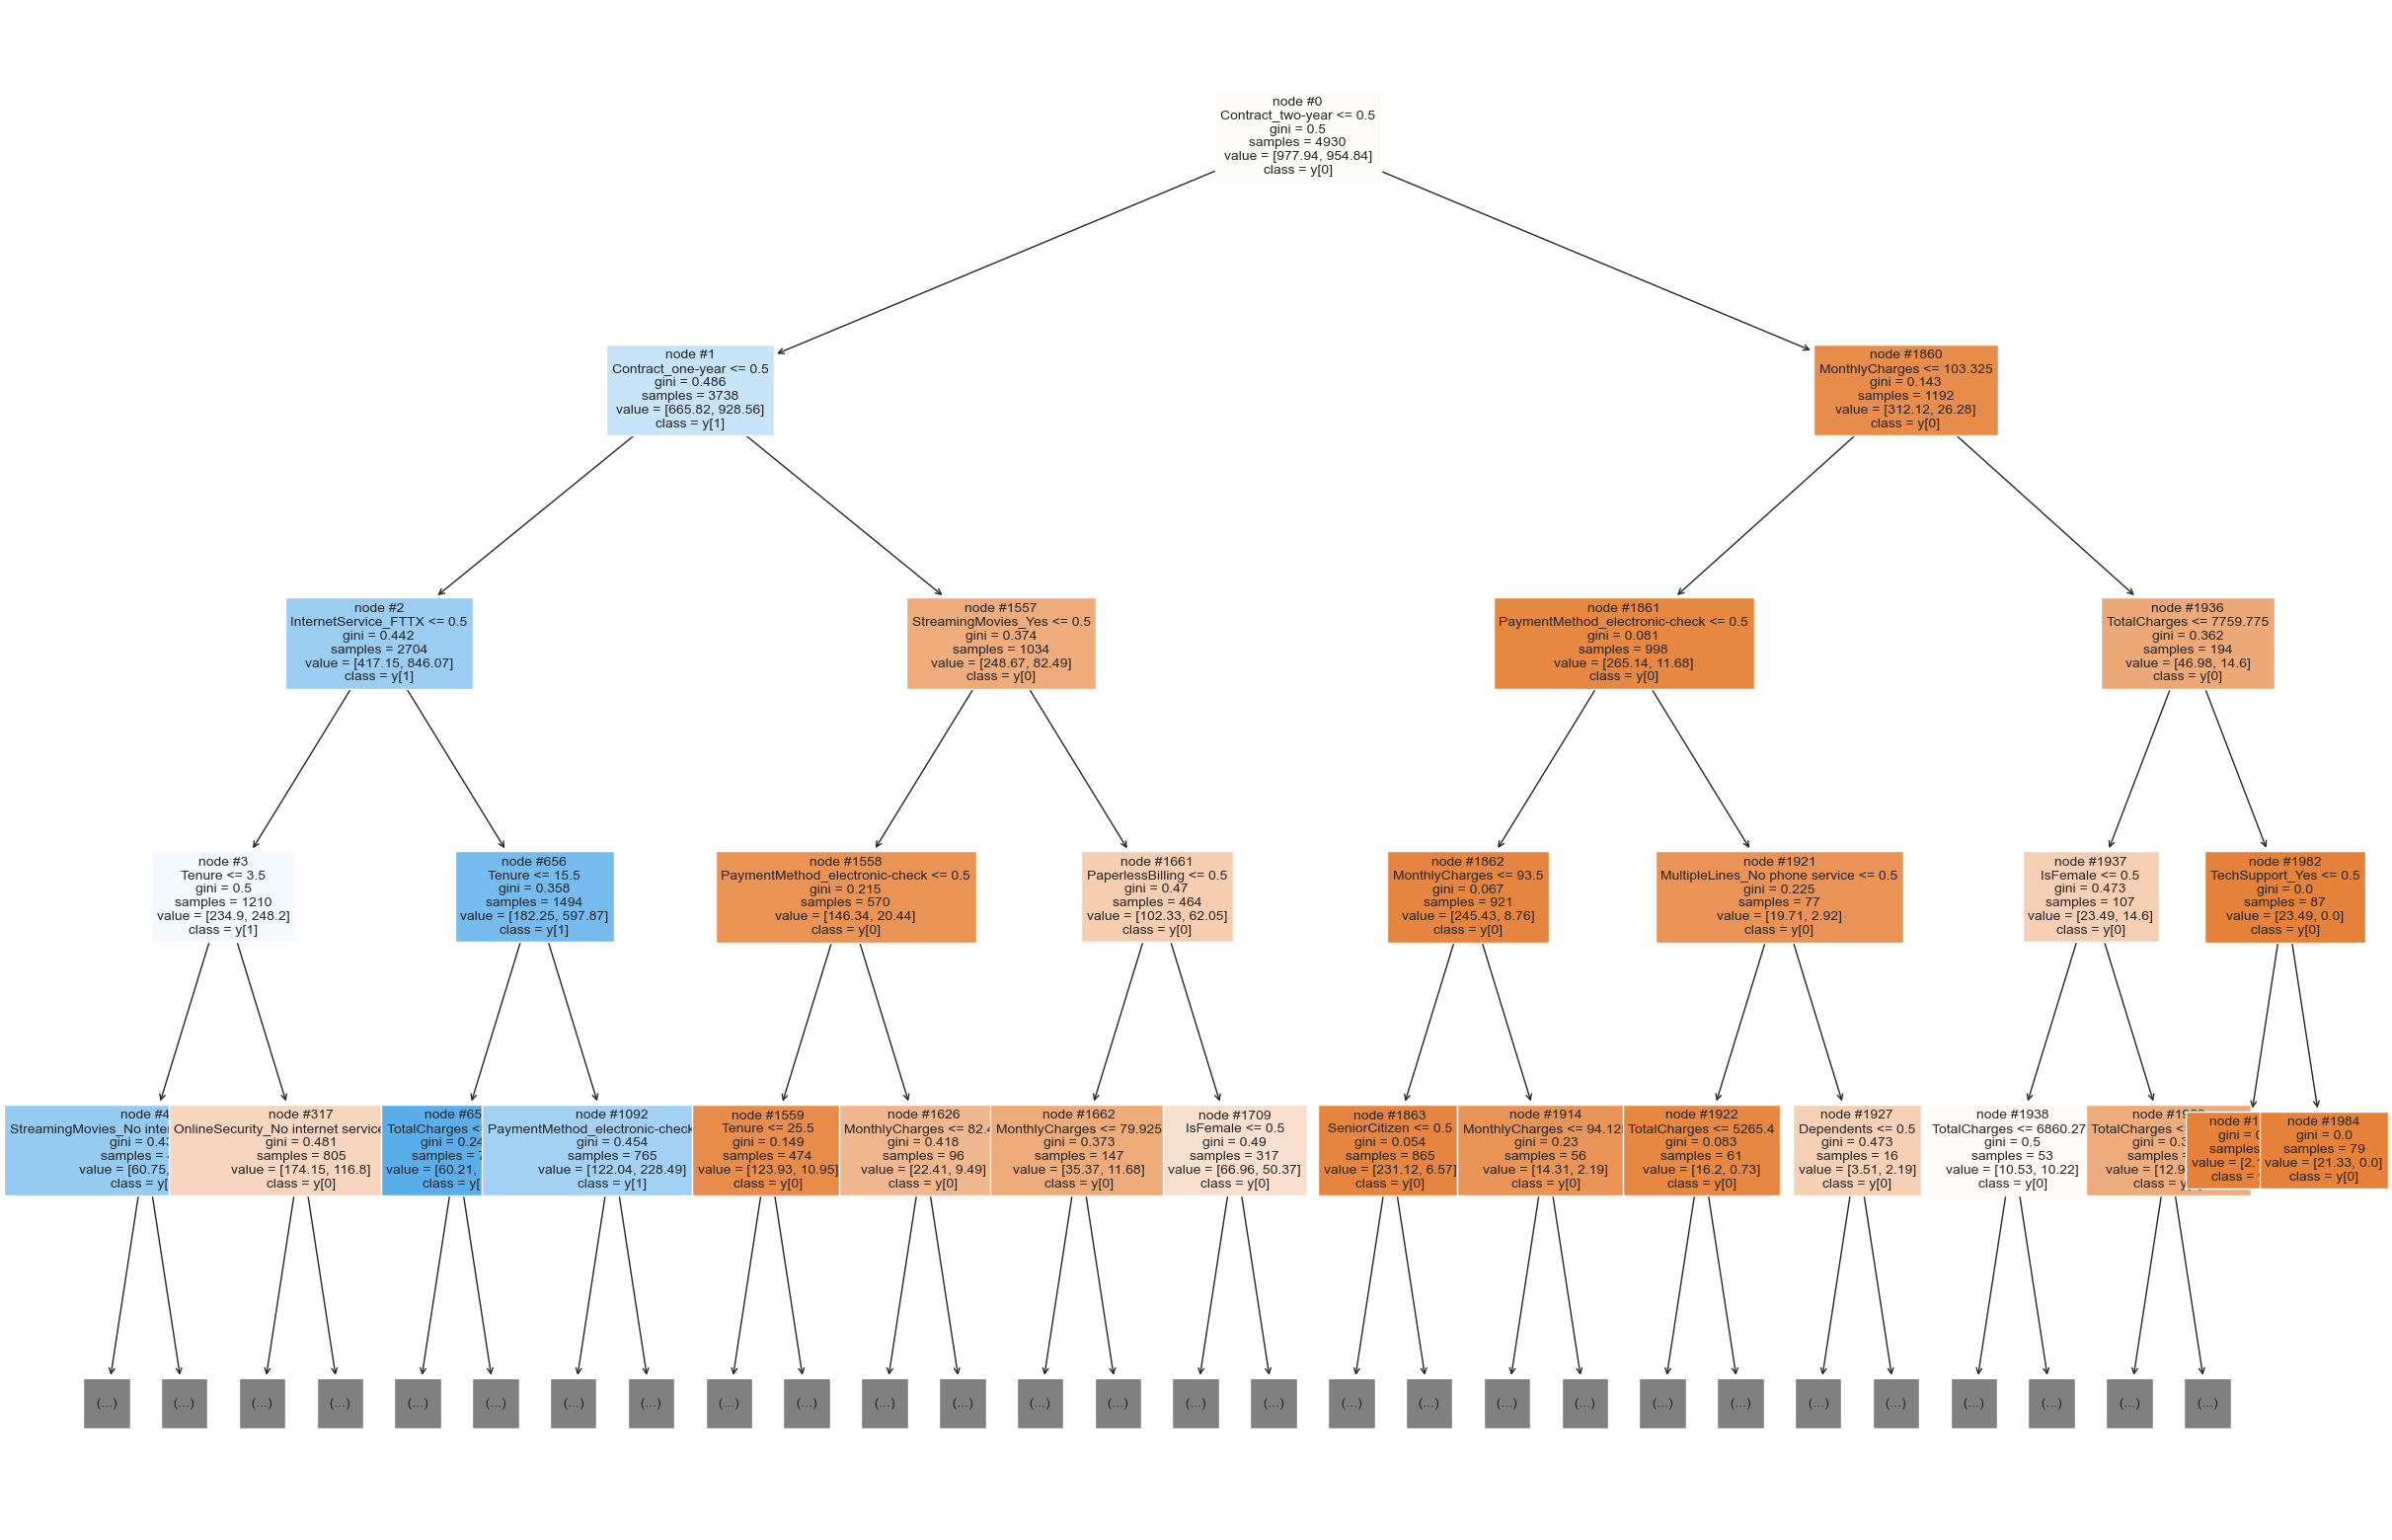

In [168]:
features = list(X_train.columns)
plt.figure(figsize = (30, 20))
tree.plot_tree(dt, max_depth=4, feature_names=features, filled=True, fontsize=10, node_ids=True, class_names=True)
plt.show()

#### **Question (12)**

Update the bellow cell providing your observations on the tree

#### **Response (12)**

**Observations**
* As we can see from the tree Contract_two_year is used as the root node which align with feature important that have high importance in prediction, also dominant class ' class =y[0] in this node is Not churn
* in right branch Totalcharge is the deciding node with  a dominant class ' class =y[0] ' Not churn
* in left branch contract one year is the deciding node with  a dominant class ' class =y[1] ' churn

Let's try to fine tune one hyperparameter `max_depth` and see the results

In [73]:
# Choose the type of classifier
dt_tunned = DecisionTreeClassifier(random_state=1, class_weight={0: 0.27, 1: 0.73}, criterion='entropy', max_depth=5)
# Fit the best algorithm to the data
dt_tunned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.27, 1: 0.73}, criterion='entropy',
                       max_depth=5, random_state=1)

               precision    recall  f1-score   support

Not Churn (0)     0.9144    0.7049    0.7961      3622
    Churn (1)     0.5000    0.8173    0.6204      1308

     accuracy                         0.7347      4930
    macro avg     0.7072    0.7611    0.7083      4930
 weighted avg     0.8045    0.7347    0.7495      4930



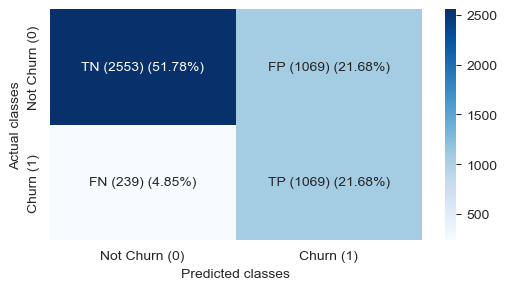

In [74]:
# Checking performance on the training dataset
y_train_pred_dt = dt_tunned.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

               precision    recall  f1-score   support

Not Churn (0)     0.8979    0.6914    0.7812      1552
    Churn (1)     0.4782    0.7825    0.5936       561

     accuracy                         0.7156      2113
    macro avg     0.6881    0.7369    0.6874      2113
 weighted avg     0.7865    0.7156    0.7314      2113



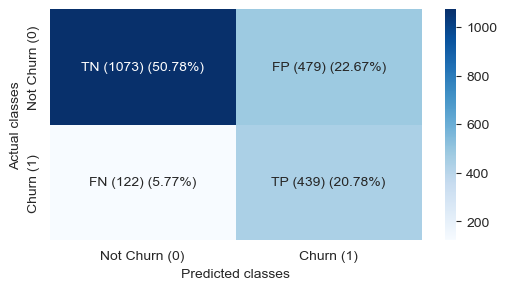

In [75]:
# Checking performance on the test dataset
y_test_pred_dt = dt_tunned.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

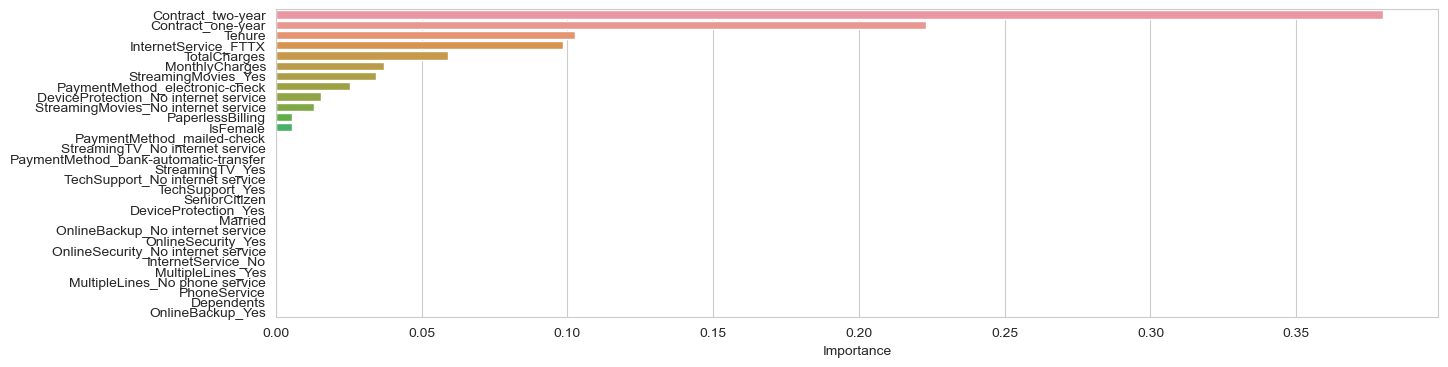

In [76]:
# Plot the feature importance of the tunned model
importances = dt_tunned.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
plt.figure(figsize = (15, 4))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)
plt.show()

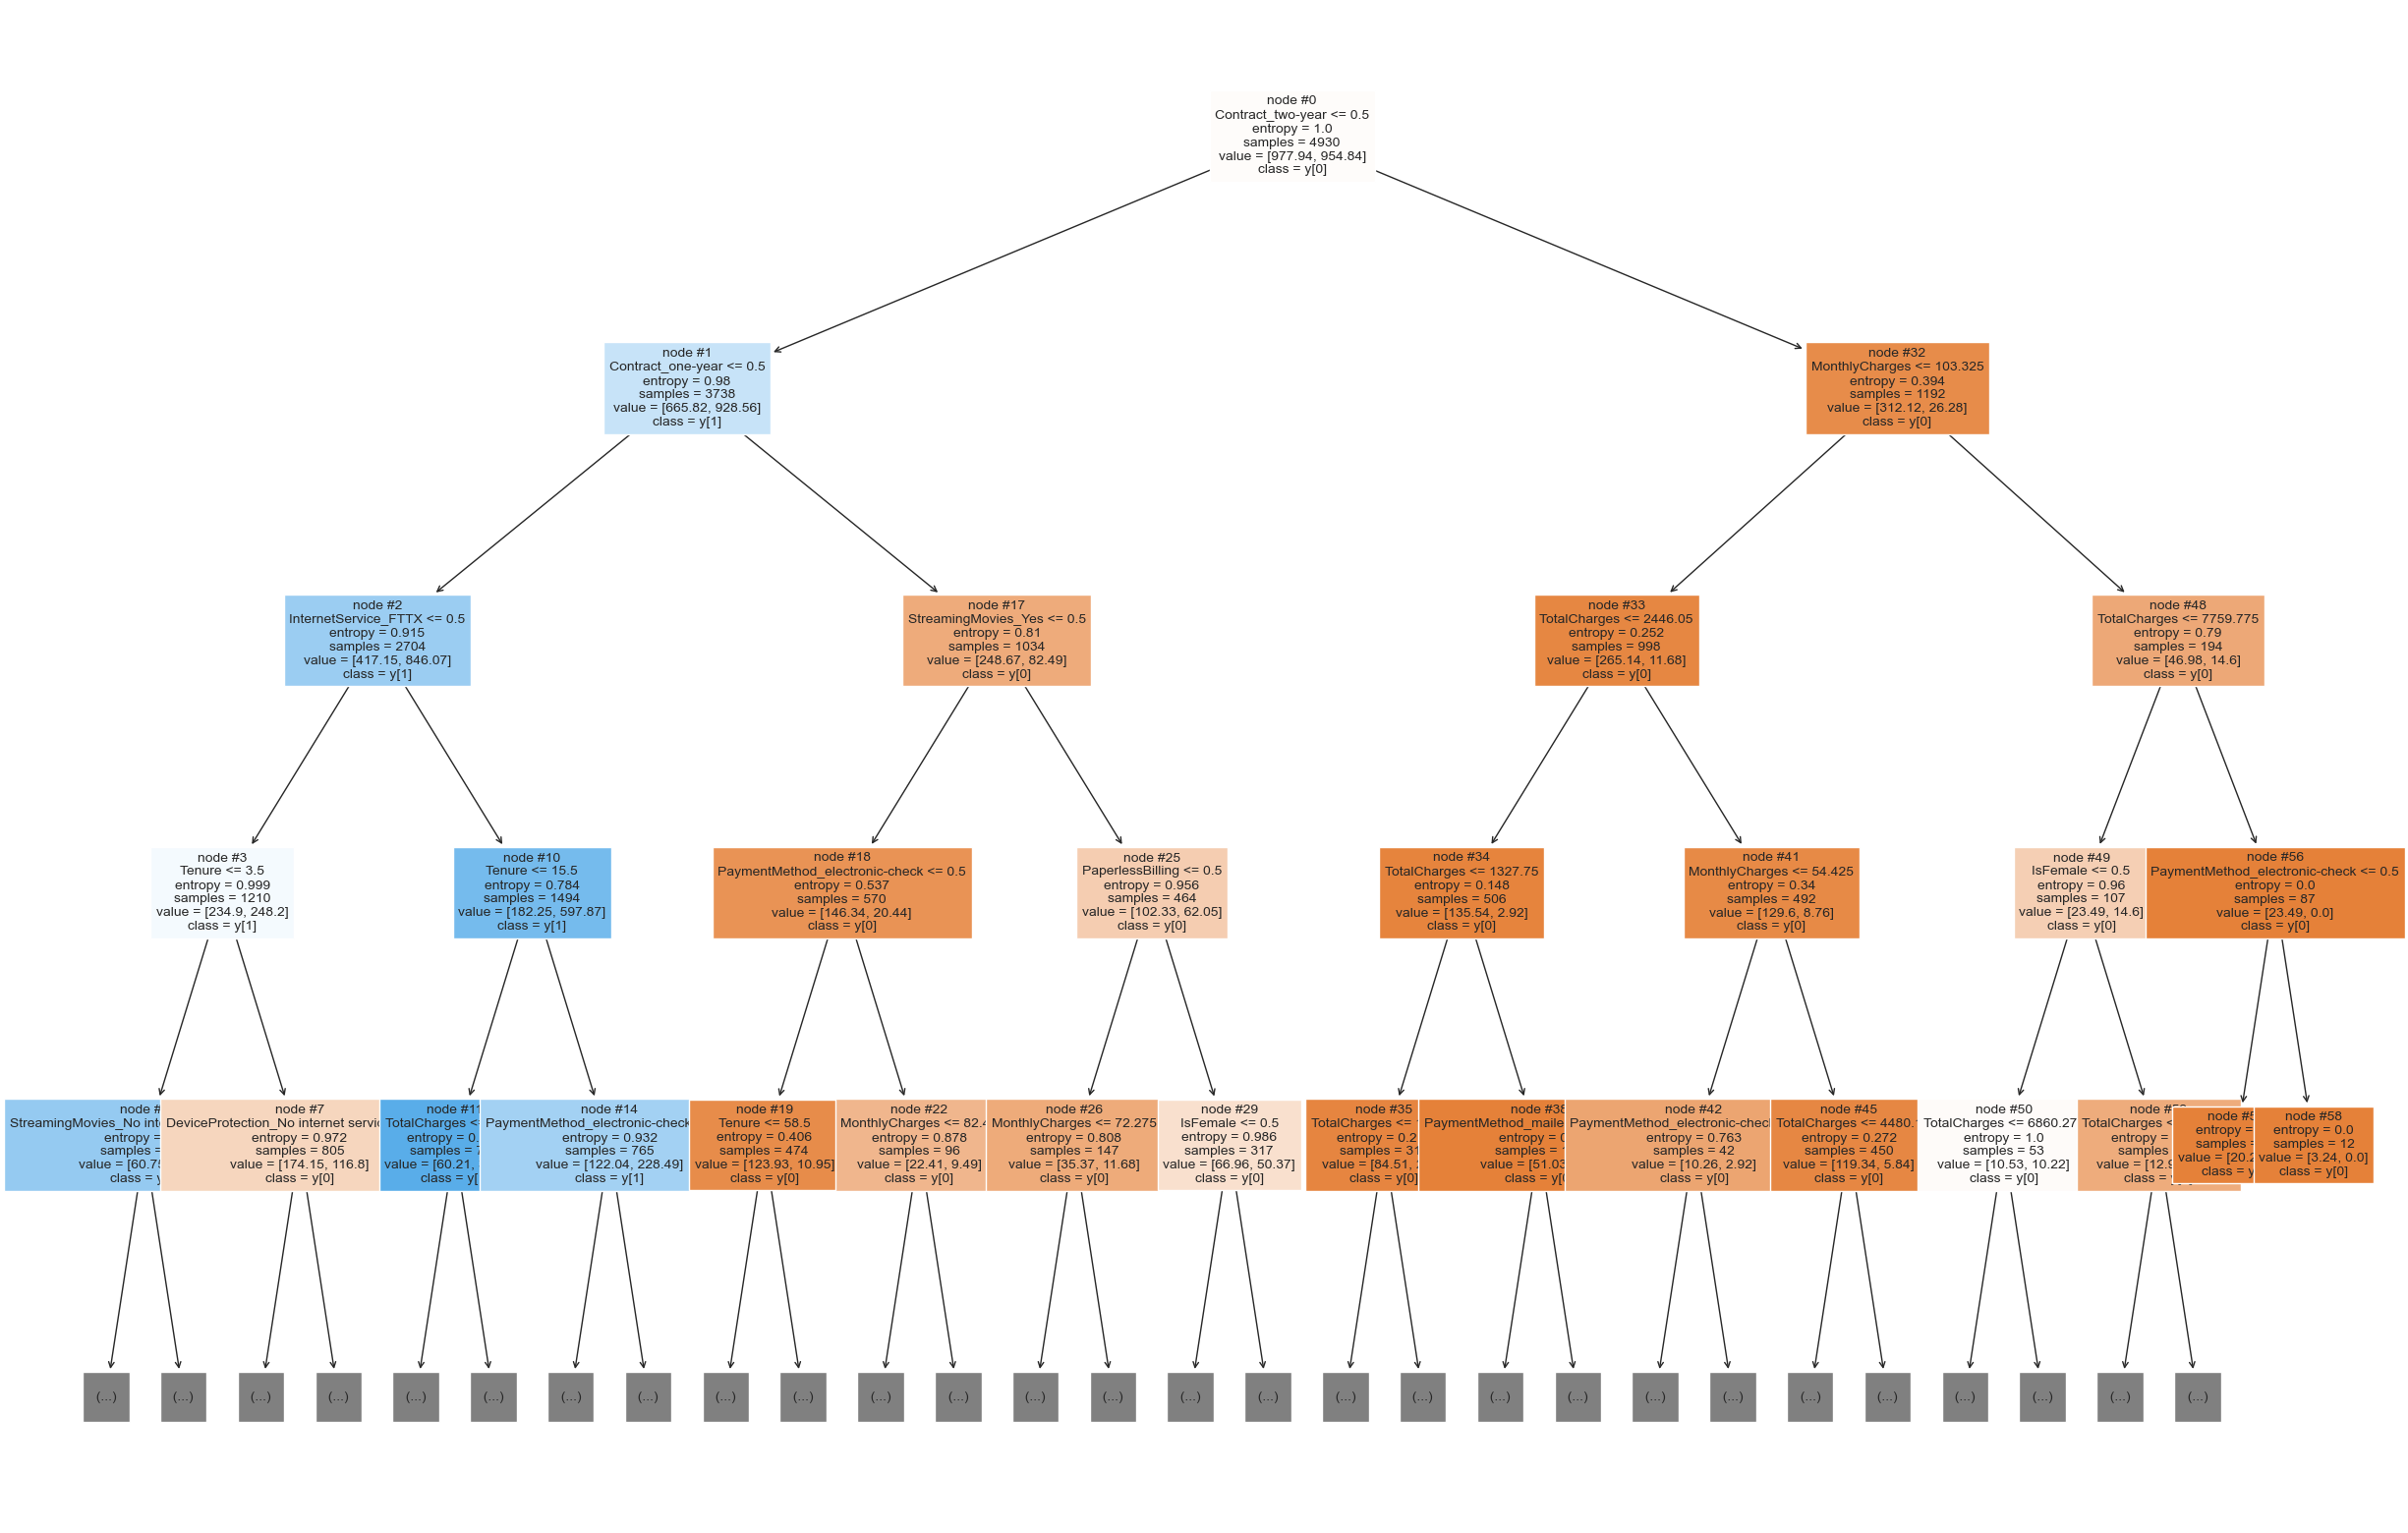

In [77]:
features = list(X_train.columns)
plt.figure(figsize = (30, 20))
tree.plot_tree(dt_tunned, max_depth=4, feature_names=features, filled=True, fontsize=10, node_ids=True, class_names=True)
plt.show()

#### **Question (13)**

Update the bellow cell providing your observations on :
* The performance of the tunned decision tree
* The features importance
* The tree

#### **Response (13)**

**Observations**

- Regarding model performance
    * Reduced Overfitting: Metrics between training and test sets are consistent, indicating good generalization.

    * High Recall for Churn: Both in training and test sets, the model excels at identifying actual churn cases but may include some false positives.

    * Balanced Performance: The model shows a balanced F1-score between classes, but there's room for improvement.

    * Overall Accuracy: Similar accuracy levels (~73%) in both training and test sets suggest the model is not overfitting.
- Feture imprtance has been changes for the first two faetures now we have Contract_one_year and Contract_two_year are really important in prediction
- not much change in term of tree, with only change of metric from gini to entropy


Let's try to fine tune multiple hyperparameters and see the results.

It's up to you to expirements multiple values to find the best paramaters.

<span style="color:#ff5f27;"> 👾 Uncomment and update the following cell code if required, cf `parameters` </span>

In [84]:
# Choose the type of classifier
dt_tunned_hp = DecisionTreeClassifier(random_state=1, class_weight={0: 0.27, 1: 0.73}, criterion='entropy')

# Grid of parameters to choose from
parameters = {
    'max_depth': [ 5, 6, 7, 8, 9, 10]
}
# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(dt_tunned, parameters, scoring=scorer, cv=10)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dt_tunned_hp = grid_obj.best_estimator_

# Fit the best algorithm to the data
dt_tunned_hp.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.27, 1: 0.73}, criterion='entropy',
                       max_depth=6, random_state=1)

               precision    recall  f1-score   support

Not Churn (0)     0.9327    0.6966    0.7975      3622
    Churn (1)     0.5061    0.8609    0.6374      1308

     accuracy                         0.7402      4930
    macro avg     0.7194    0.7787    0.7175      4930
 weighted avg     0.8195    0.7402    0.7551      4930



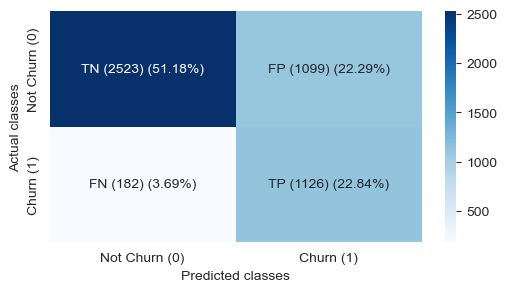

In [85]:
# Checking performance of the tunned DT model on the training data
y_pred_train_dt_tunned = dt_tunned_hp.predict(X_train)
metrics_score(y_train, y_pred_train_dt_tunned)

               precision    recall  f1-score   support

Not Churn (0)     0.9047    0.6791    0.7759      1552
    Churn (1)     0.4747    0.8021    0.5964       561

     accuracy                         0.7118      2113
    macro avg     0.6897    0.7406    0.6861      2113
 weighted avg     0.7905    0.7118    0.7282      2113



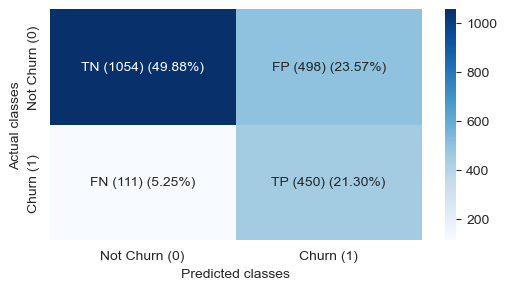

In [86]:
# Checking performance ofthe DT tunned on the testing data
y_pred_test_dt_tunned = dt_tunned_hp.predict(X_test)
metrics_score(y_test, y_pred_test_dt_tunned)

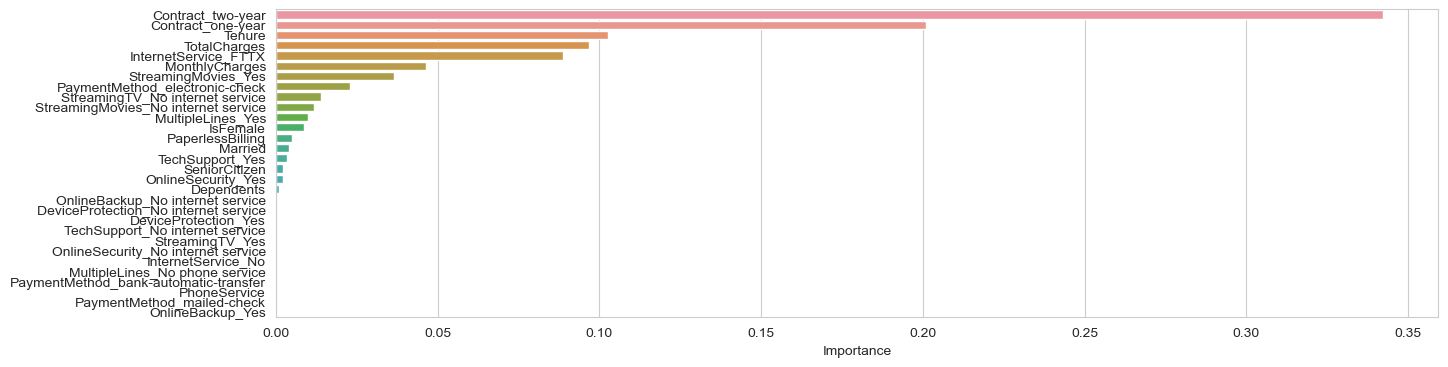

In [87]:
# Plot the feature importance of the tunned model
importances = dt_tunned_hp.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
plt.figure(figsize = (15, 4))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)
plt.show()

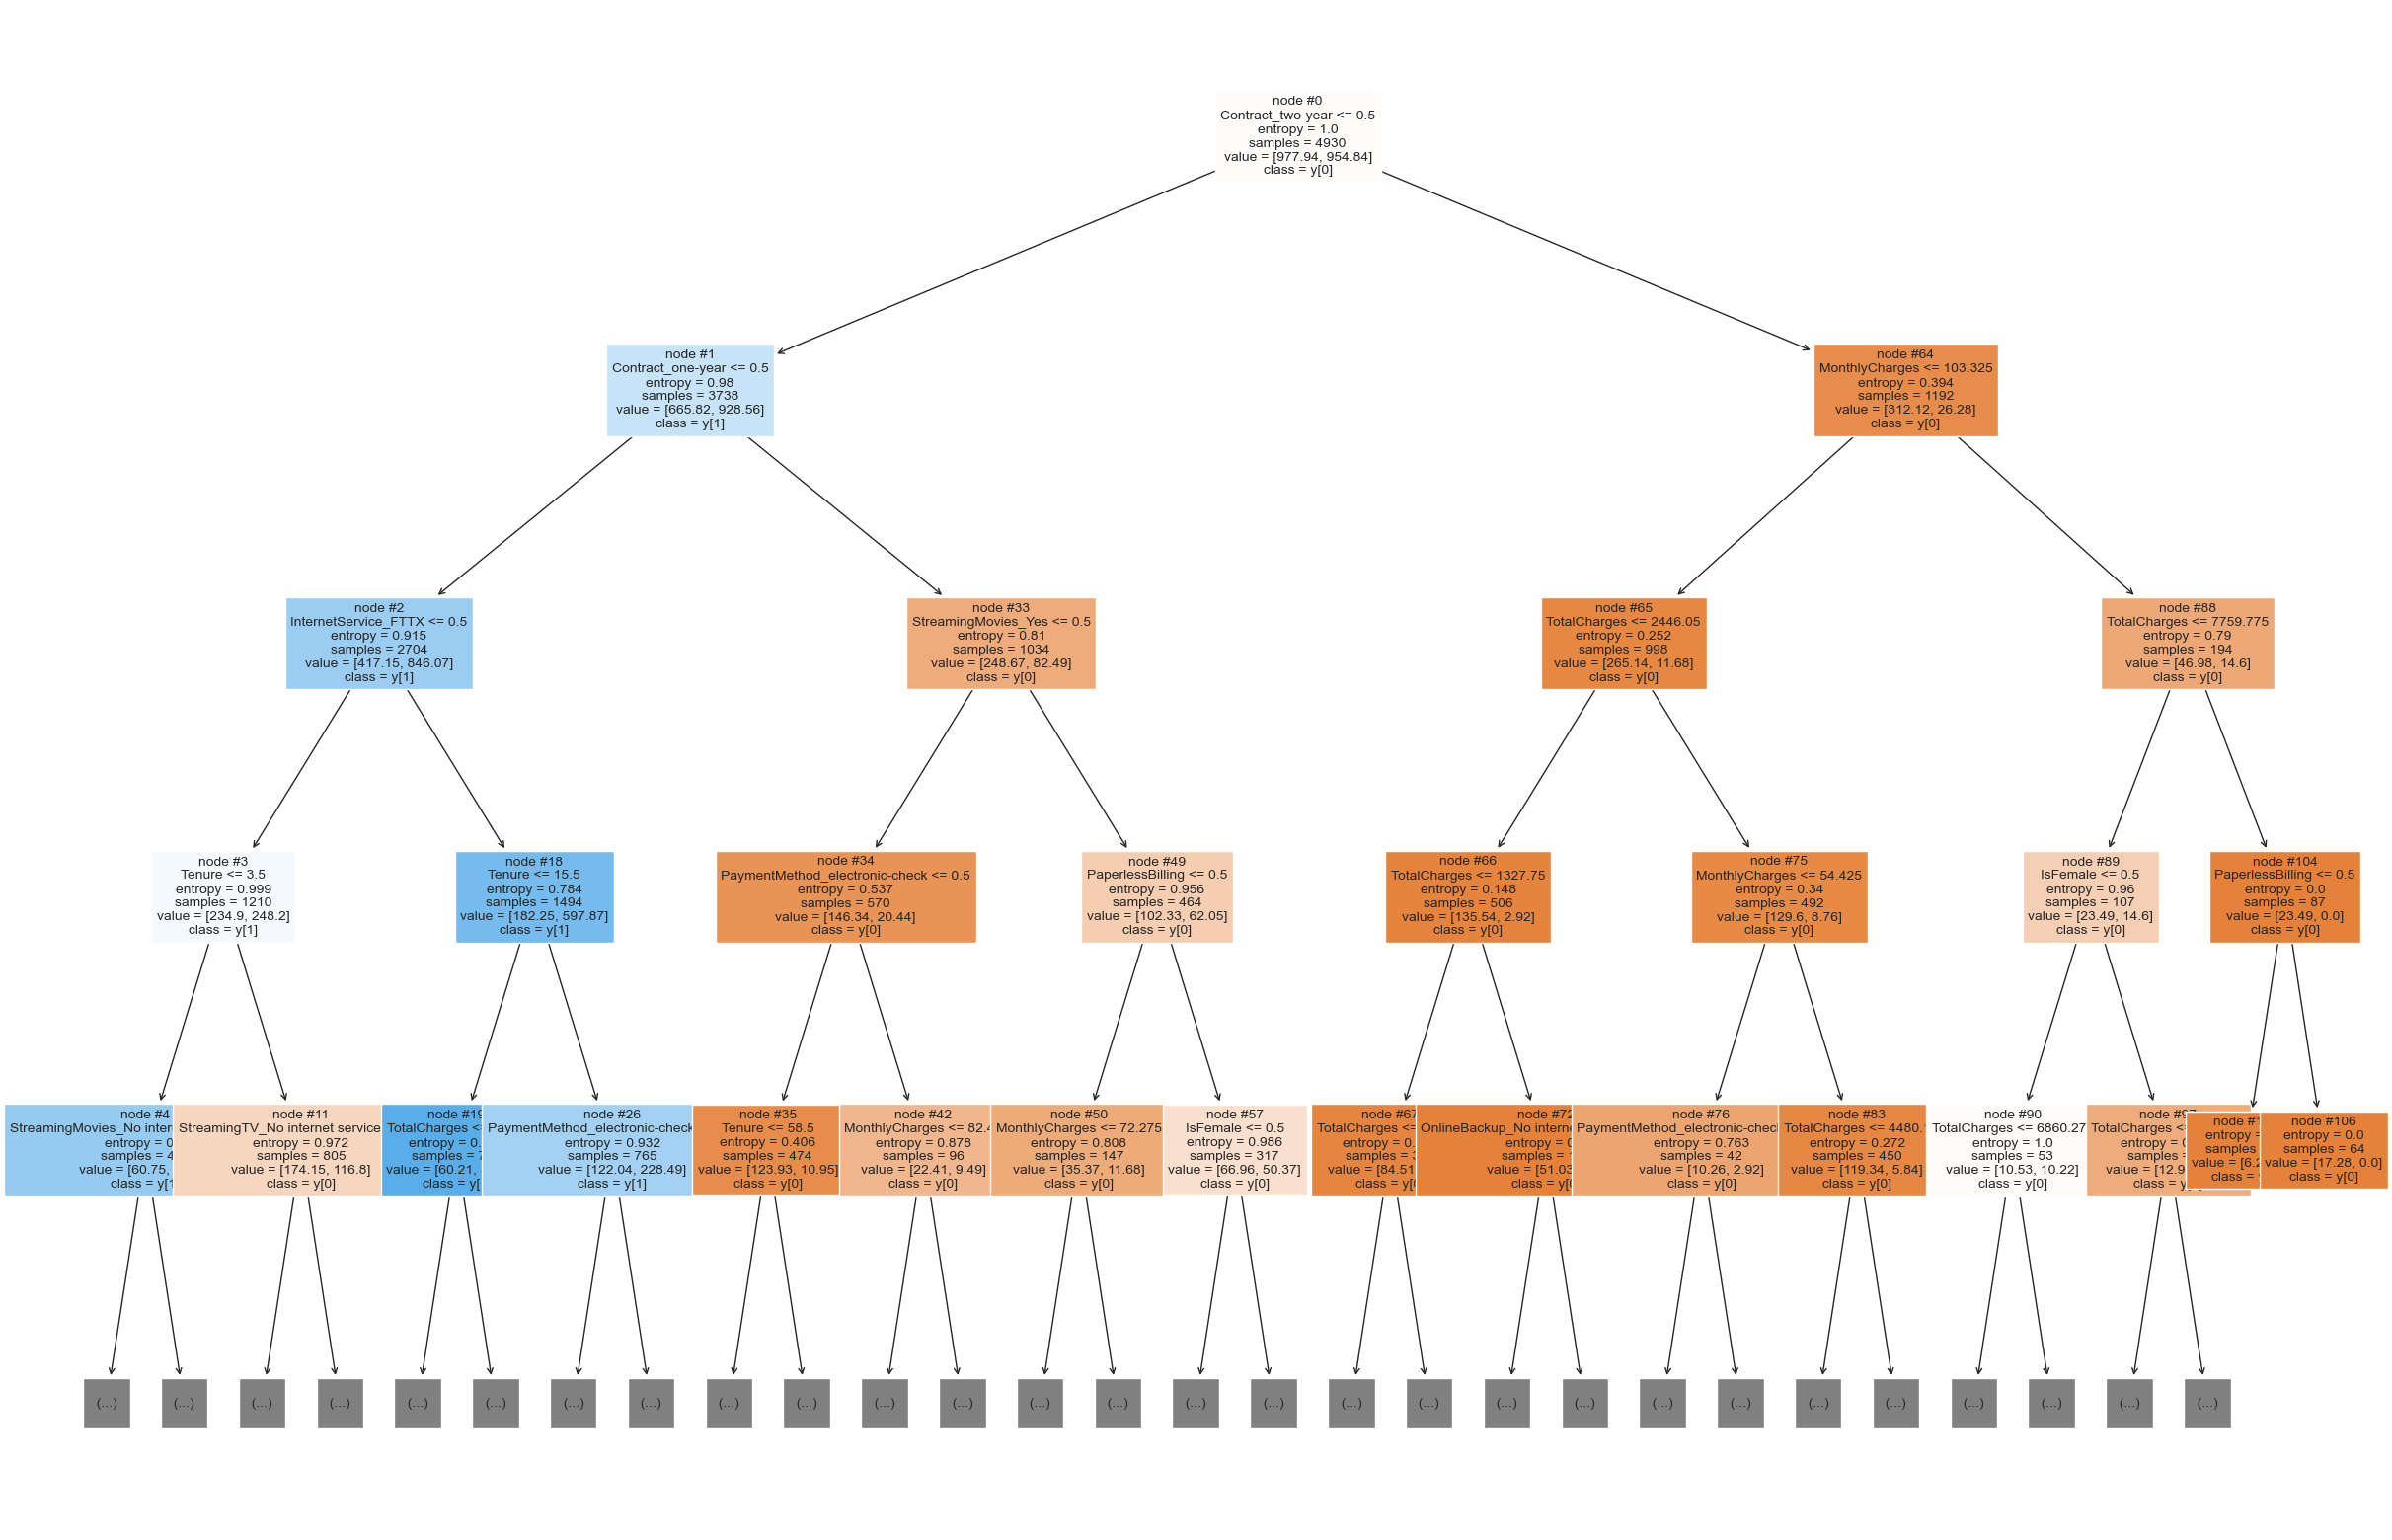

In [88]:
features = list(X_train.columns)
plt.figure(figsize = (30, 20))
tree.plot_tree(dt_tunned_hp, max_depth=4, feature_names=features, filled=True, fontsize=10, node_ids=True, class_names=True)
plt.show()

#### **Question (14)**

Update the bellow cell providing your observations on :
* The performance of the tunned decision tree
* The features importance
* The tree

#### **Response (14)**

**Observations**
- Performance:
    * High Recall: Achieves 86.09% recall for "Churn" on the training set and 80.21% on the test set.
    * Lower Precision: Precision for "Churn" is 50.61% in the training set and 47.47% in the test set, indicating some false positives.
    * Good Generalization: Accuracy is 74.02% on the training set and 71.18% on the test set, showing the model generalizes well.
- Feature importance:
    * Contract Duration: The two most important features are Contract_two-year (34.217%) and Contract_one-year (20.095%). This indicates that the length of the contract is a significant factor in predicting customer churn.
    * Tenure and Charges: Tenure (10.255%) and TotalCharges (9.670%) are also critical features, suggesting that the amount of time a customer has been with the company and the total amount they've been charged are important factors.
    * The contract length, tenure, and charges are the most influential factors in predicting customer churn according to this model. On the other hand, demographic features and specific services like online backup have negligible impact.

# **Neural Network**

## **Question (15)**

This is a bonus/optionnal question.

* Can apply a new approach to the problem using **ANN**
* Feel free with your imagination here

**Scaling the data**

The independent variables in this dataset have different scales. When features have different scales from each other, there is a chance that a higher weightage will be given to features that have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature.

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

We will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score. It standardizes features by subtracting the mean and scaling it to have unit variance. The standard score of sample x is calculated as:

> **z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

In [91]:
# Scaling the data
sc = StandardScaler()

# Complete the code to scale the data

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)



In [93]:
print(X_train_scaled[:5, :])


[[-0.43814715 -0.96295739 -0.65086184 -1.11455597  0.33445908 -1.20529512
   0.50485198 -0.83853354 -0.33445908 -0.85678685  1.12453737 -0.52587133
  -0.52587133 -0.63699286 -0.52587133 -0.73200106 -0.52587133 -0.73265479
  -0.52587133 -0.64581257 -0.52587133  1.2409383  -0.52587133 -0.80242214
   1.00528781 -0.53121056  1.40607722 -0.54281015 -0.51517027 -0.5647009 ]
 [ 2.28233828 -0.96295739 -0.65086184 -1.19575332  0.33445908  0.82967232
   0.72484976 -0.9098221  -0.33445908 -0.85678685  1.12453737 -0.52587133
  -0.52587133 -0.63699286 -0.52587133 -0.73200106 -0.52587133  1.36489928
  -0.52587133 -0.64581257 -0.52587133  1.2409383  -0.52587133 -0.80242214
   1.00528781 -0.53121056  1.40607722 -0.54281015 -0.51517027 -0.5647009 ]
 [-0.43814715  1.03846754 -0.65086184 -1.19575332  0.33445908  0.82967232
   0.337786   -0.91165561 -0.33445908  1.16715143  1.12453737 -0.52587133
  -0.52587133 -0.63699286 -0.52587133 -0.73200106 -0.52587133 -0.73265479
  -0.52587133 -0.64581257 -0.5258713

In [94]:
print(X_test_scaled[:5, :])


[[-0.43814715 -0.96295739 -0.65086184 -0.58677321  0.33445908  0.82967232
   1.02920758 -0.24637575 -0.33445908 -0.85678685  1.12453737 -0.52587133
  -0.52587133  1.5698763  -0.52587133 -0.73200106 -0.52587133 -0.73265479
  -0.52587133 -0.64581257 -0.52587133  1.2409383  -0.52587133  1.24622683
   1.00528781 -0.53121056  1.40607722 -0.54281015 -0.51517027 -0.5647009 ]
 [-0.43814715  1.03846754  1.53642438 -0.99275995  0.33445908 -1.20529512
  -1.5181351  -0.91822568 -0.33445908 -0.85678685 -0.88925458  1.90160587
   1.90160587 -0.63699286  1.90160587 -0.73200106  1.90160587 -0.73265479
   1.90160587 -0.64581257  1.90160587 -0.80584184  1.90160587 -0.80242214
   1.00528781 -0.53121056 -0.71119849  1.84226475 -0.51517027  1.77084896]
 [ 2.28233828 -0.96295739 -0.65086184 -0.50557586  0.33445908  0.82967232
   1.11191351 -0.20180402 -0.33445908  1.16715143  1.12453737 -0.52587133
  -0.52587133 -0.63699286 -0.52587133 -0.73200106 -0.52587133  1.36489928
  -0.52587133 -0.64581257 -0.5258713

In [161]:
# Initializing the ANN
model = Sequential()

# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation='relu', input_dim=X_train_scaled.shape[1], units=16))

# Add 1st hidden layer
model.add(Dense(units=16, activation='relu'))

# Add 2st hidden layer
model.add(Dense(units=8, activation='relu'))

# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of our output (Churn or Not)
# We use the **** because we want probability outcomes
model.add(Dense(units=1, activation='sigmoid'))

In [162]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [163]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                496       
                                                                 
 dense_21 (Dense)            (None, 16)                272       
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________


In [164]:
history = model.fit(X_train_scaled,
                    y_train,
                    validation_split=0.25,
                    epochs=50,
                    batch_size=128,
                    verbose=1)

Epoch 1/50


29/29 [==============================] - 1s 8ms/step - loss: 0.5995 - accuracy: 0.6827 - val_loss: 0.5151 - val_accuracy: 0.7648
Epoch 2/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7717 - val_loss: 0.4645 - val_accuracy: 0.7664
Epoch 3/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.7971 - val_loss: 0.4518 - val_accuracy: 0.7607
Epoch 4/50
29/29 [==============================] - 0s 3ms/step - loss: 0.4337 - accuracy: 0.7988 - val_loss: 0.4475 - val_accuracy: 0.7713
Epoch 5/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.7988 - val_loss: 0.4463 - val_accuracy: 0.7753
Epoch 6/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8036 - val_loss: 0.4449 - val_accuracy: 0.7762
Epoch 7/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8034 - val_loss: 0.4439 - val_accuracy: 0.7737
Epoch 8/50
29/29 [=============

 1/67 [..............................] - ETA: 1s - loss: 0.6486 - accuracy: 0.7188

67/67 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.7880


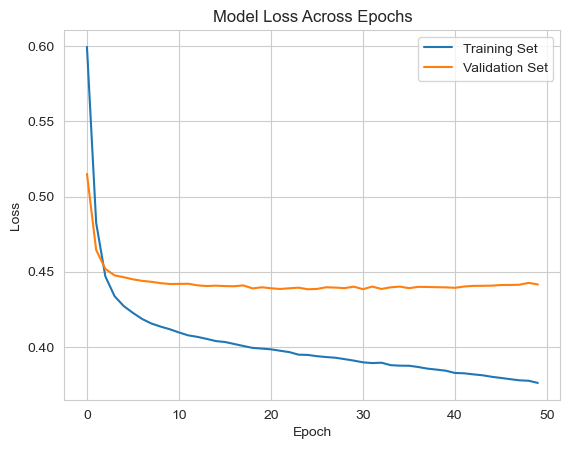

In [165]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('Model Loss Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(("Training Set" , "Validation Set") , loc =0)


#Printing results
results = model.evaluate(X_test_scaled, y_test)

 1/67 [..............................] - ETA: 4s

67/67 [==============================] - 0s 1ms/step
Best Threshold=0.252778, G-Mean=0.755


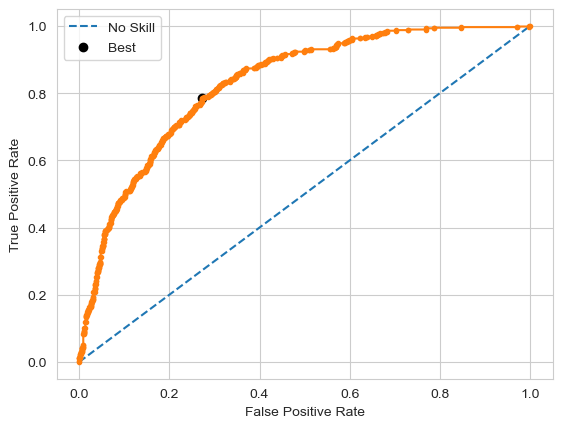

In [166]:
# predict probabilities
yhat = model.predict(X_test_scaled)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

46/67 [===================>..........] - ETA: 0s

67/67 [==============================] - 0s 1ms/step
               precision    recall  f1-score   support

Not Churn (0)     0.9025    0.7274    0.8056      1552
    Churn (1)     0.5093    0.7825    0.6170       561

     accuracy                         0.7421      2113
    macro avg     0.7059    0.7550    0.7113      2113
 weighted avg     0.7981    0.7421    0.7555      2113



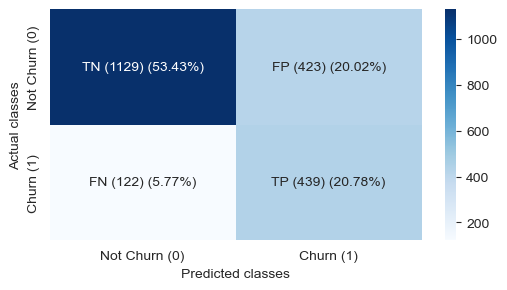

In [167]:
y_pred_test = model.predict(X_test_scaled)
y_pred_test = (y_pred_test > thresholds[ix])
metrics_score(y_test, y_pred_test)